## Import libraries 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, label_binarize, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection,  tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,  matthews_corrcoef
from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

In [2]:
sns.set_style('whitegrid')

In [3]:
#os.listdir('/kaggle/input')

## Dataset information

Nr of lines: 7043 

Nr of attributes: 50

In this supervised learning problem, I will be dealing with customer churn, which is a phenom that refers to loss of customers, because of dissatisfaction with products. The goal is to identify trends in customer behavior in order to retain clients and avoid churn.

Goals of the project:

1. Analyze why customers are leaving the company, answering the business questions: 

* Which services tend to have high churn?

* What would we do to reduce churn?

* Strategies suggested to reduce churn in the future?

2. Develop a ML Model to predict customer churn, with the target 'churn label';

## Import data

In [4]:
#telco_df=pd.read_csv('/kaggle/input/telco-customer-churn-11-1-3/telco.csv')
telco_df=pd.read_csv('../data/telco.csv')

telco_final_df=pd.DataFrame() #este dataset vai armazenar os dados ja preprocessados

In [5]:
telco_df #1st option to see the data

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


In [6]:
#with pd.option_context('display.max_columns', None, 'display.width', 100):

    #print(telco_df) 

In [7]:
display(telco_df.head(5).T) #2nd option to see the data

,0,1,2,3,4
Customer ID,8779-QRDMV,7495-OOKFY,1658-BYGOY,4598-XLKNJ,4846-WHAFZ
Gender,Male,Female,Male,Female,Female
Age,78,74,71,78,80
Under 30,No,No,No,No,No
Senior Citizen,Yes,Yes,Yes,Yes,Yes
Married,No,Yes,No,Yes,Yes
Dependents,No,Yes,Yes,Yes,Yes
Number of Dependents,0,1,3,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California


## Pre-processing

Function to do the EDA (exploratory data analysis)

In [8]:
def telecom_func(data, column, count=True):
    print(f'Qty of unique values: {data[column].nunique()}')
    print(f'\nWhich are the unique values: {data[column].unique()}')
    print(f'\Qty of null values: {data[column].isnull().sum()}')

    # Verifies if the column is numeric
    if pd.api.types.is_numeric_dtype(data[column]):
        # Do the counting and sorts the numerics values
        sorted_counts = data[column].value_counts(dropna=False).sort_index()
        print(f'\Qty per option (sorted):\n{sorted_counts}')

    # Verifies if the column is categoric and do the sorting
    elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:
        sorted_counts = data[column].value_counts(dropna=False).sort_index()
        print(f'\Qty per option (sorted):\n{sorted_counts}')
    else:
        # Caso contrário, apenas mostra o value_counts sem ordenar
        print(f'\Qty per option:\n{data[column].value_counts(dropna=False)}')    

    # Condição para exibir o gráfico apenas se o número de categorias for menor ou igual a 20
    if count:
        if data[column].nunique() <= 20:
            sns.countplot(data=data, x=column, hue='Churn Label')
            plt.show()
        else:
            print(f'Number of categories in "{column}" is greater than 20, countplot graphic wont be displayed.')
    else:
        sns.displot(data[column], kde=True)

<>:4: SyntaxWarning: invalid escape sequence '\Q'
<>:10: SyntaxWarning: invalid escape sequence '\Q'
<>:15: SyntaxWarning: invalid escape sequence '\Q'
<>:18: SyntaxWarning: invalid escape sequence '\Q'
<>:4: SyntaxWarning: invalid escape sequence '\Q'
<>:10: SyntaxWarning: invalid escape sequence '\Q'
<>:15: SyntaxWarning: invalid escape sequence '\Q'
<>:18: SyntaxWarning: invalid escape sequence '\Q'
C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:4: SyntaxWarning: invalid escape sequence '\Q'
  print(f'\Qty of null values: {data[column].isnull().sum()}')
C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:10: SyntaxWarning: invalid escape sequence '\Q'
  print(f'\Qty per option (sorted):\n{sorted_counts}')
C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:15: SyntaxWarning: invalid escape sequence '\Q'
  print(f'\Qty per option (sorted):\n{sorted_counts}')
C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:18

In [9]:
print('Number of duplicated values in the dataframe')
telco_df.duplicated().sum()

Number of duplicated values in the dataframe


0

### 1. Churn label

Qty of unique values: 2

Which are the unique values: ['Yes' 'No']
\Qty of null values: 0
\Qty per option:
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


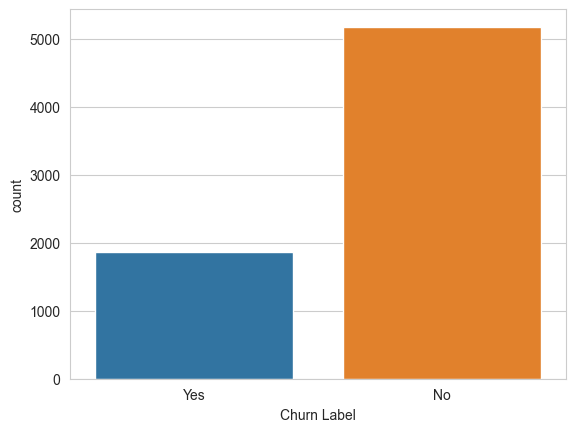

In [10]:
telecom_func(telco_df,'Churn Label')

Looking at the proportions, we can see that 73.46% of the data is labeled as "No" and the rest, 26.54%, corresponds the label "Yes" (customers church).

In [11]:
#vamos substituir No-0 e Yes-1  na variavel alvo

telco_final_df['Churn Label']=telco_df['Churn Label']

telco_final_df['Churn Label']=telco_final_df['Churn Label'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3665366360.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Churn Label']=telco_final_df['Churn Label'].replace(['No','Yes'],[0,1])


### 2. Customer ID

column deleted because its an ID.

### 3. Gender

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 2

Which are the unique values: ['Male' 'Female']
\Qty of null values: 0
\Qty per option:
Gender
Male      3555
Female    3488
Name: count, dtype: int64


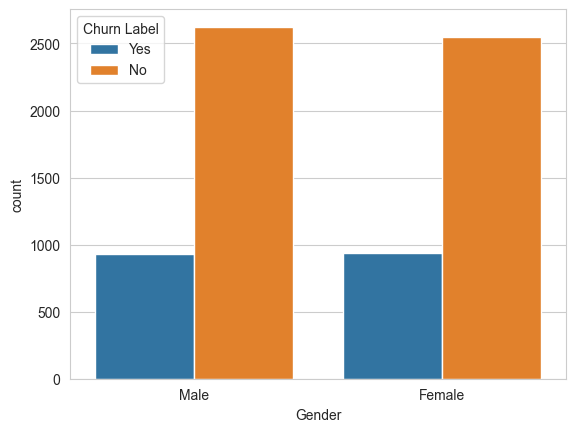

In [12]:
telecom_func(telco_df,'Gender')

In [13]:
#vamos substituir Male-0 e Female-1  

telco_final_df['Gender']=telco_df['Gender'].replace(['Male','Female'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\96428942.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Gender']=telco_df['Gender'].replace(['Male','Female'],[0,1])


In [14]:
telco_final_df

,Churn Label,Gender
0,1,0
1,1,1
2,1,0
3,1,1
4,1,1
...,...,...
7038,0,1
7039,0,0
7040,0,1
7041,0,1


In [15]:
telco_final_df[['Gender','Churn Label']].corr()

,Gender,Churn Label
Gender,1.000000,0.008612
Churn Label,0.008612,1.000000


There is a low correlation between the 2 columns

### 4. Age

Qty of unique values: 62

Which are the unique values: [78 74 71 80 72 76 66 70 77 65 67 68 69 79 75 73 37 19 31 23 38 21 29 61
 27 20 56 51 48 32 34 41 30 26 62 64 45 53 63 42 24 54 39 43 50 22 40 47
 60 52 55 59 49 58 25 28 33 44 57 46 36 35]
\Qty of null values: 0
\Qty per option (sorted):
Age
19    127
20    127
21    140
22    130
23    146
     ... 
76     69
77     72
78     63
79     76
80     66
Name: count, Length: 62, dtype: int64


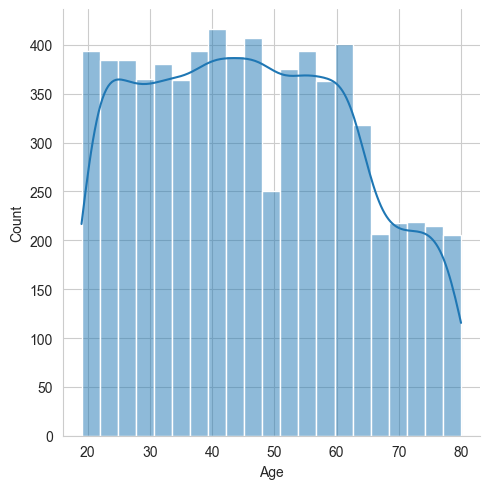

In [16]:
telecom_func(telco_df, 'Age', False)

In [17]:
telco_final_df['Age']=telco_df['Age']

grouping ranges of 'age', creating a new columns 'AgeGroup'

In [18]:
telco_final_df['AgeGroup'] = pd.cut(telco_df['Age'],

                             bins=[18, 21, 31, 41, 51, 61, 71, 80], 

                             labels=['19-21','21-31', '31-41', '41-51', '51-61', '61-71','71-80'])


telco_final_df.head(2155) 

,Churn Label,Gender,Age,AgeGroup
0,1,0,78,71-80
1,1,1,74,71-80
2,1,0,71,61-71
3,1,1,78,71-80
4,1,1,80,71-80
...,...,...,...,...
2150,1,0,24,21-31
2151,1,1,64,61-71
2152,1,0,53,51-61
2153,1,0,55,51-61


In [19]:
telco_final_df = telco_final_df.drop('Age', axis=1) 

In [20]:
telco_final_df

,Churn Label,Gender,AgeGroup
0,1,0,71-80
1,1,1,71-80
2,1,0,61-71
3,1,1,71-80
4,1,1,71-80
...,...,...,...
7038,0,1,21-31
7039,0,0,31-41
7040,0,1,21-31
7041,0,1,31-41


### 5. Age Group

Qty of unique values: 7

Which are the unique values: ['71-80', '61-71', '31-41', '19-21', '21-31', '51-61', '41-51']
Categories (7, object): ['19-21' < '21-31' < '31-41' < '41-51' < '51-61' < '61-71' < '71-80']
\Qty of null values: 0
\Qty per option (sorted):
AgeGroup
19-21     394
21-31    1254
31-41    1279
41-51    1330
51-61    1262
61-71     885
71-80     639
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


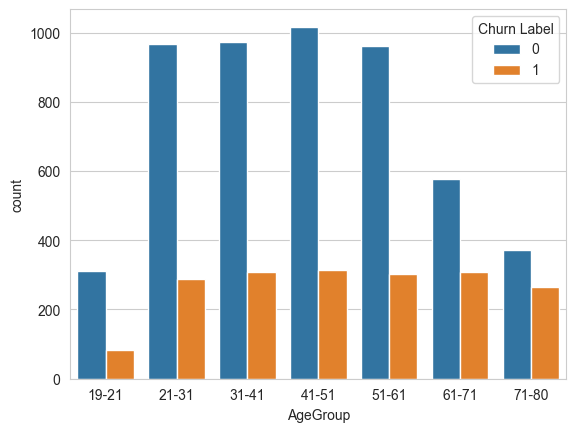

In [21]:
telecom_func(telco_final_df, 'AgeGroup')

### 6. Under 30 

Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Under 30
No     5642
Yes    1401
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


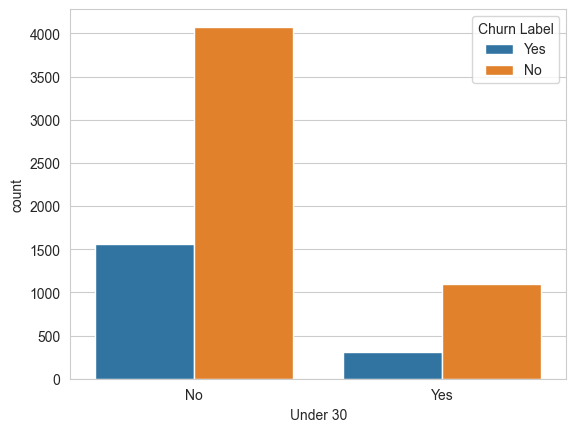

In [22]:
telecom_func(telco_df, 'Under 30')

In [23]:
#vamos substituir No-0 e Yes-1  

#telco_final_df['Under 30']=telco_df['Under 30'].replace(['No','Yes'],[0,1])


In [24]:
telco_final_df

,Churn Label,Gender,AgeGroup
0,1,0,71-80
1,1,1,71-80
2,1,0,61-71
3,1,1,71-80
4,1,1,71-80
...,...,...,...
7038,0,1,21-31
7039,0,0,31-41
7040,0,1,21-31
7041,0,1,31-41


In [25]:
'''with pd.option_context('display.max_columns', None):

    print(telco_final_df[telco_final_df['Under 30'] == 1])'''

"with pd.option_context('display.max_columns', None):\n\n    print(telco_final_df[telco_final_df['Under 30'] == 1])"

### 7. Senior Citizen

Qty of unique values: 2

Which are the unique values: ['Yes' 'No']
\Qty of null values: 0
\Qty per option:
Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


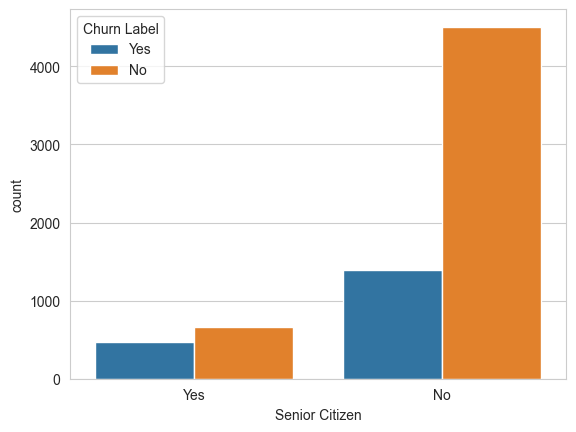

In [26]:
telecom_func(telco_df,'Senior Citizen')

In [27]:
#vamos substituir No-0 e Yes-1  

telco_final_df['Senior Citizen']=telco_df['Senior Citizen'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\2264322794.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Senior Citizen']=telco_df['Senior Citizen'].replace(['No','Yes'],[0,1])


In [28]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen
0,1,0,71-80,1
1,1,1,71-80,1
2,1,0,61-71,1
3,1,1,71-80,1
4,1,1,71-80,1
...,...,...,...,...
7038,0,1,21-31,0
7039,0,0,31-41,0
7040,0,1,21-31,0
7041,0,1,31-41,0


In [29]:
# Selecionar apenas as colunas de interesse
# So vai funcionar depois de fazer codificacao (under 30)
''' 
cols_of_interest = ['Age', 'Under 30', 'Senior Citizen', 'Churn Label']
corr = telco_final_df[cols_of_interest].corr()

# Configurar o gráfico
f, ax1 = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm_r', annot_kws={'size': 12}, ax=ax1)
ax1.set_title("Correlation Matrix for Age Group, Under 30, Senior Citizen, and Churn Label", fontsize=14)

plt.show() ''' 

' \ncols_of_interest = [\'Age\', \'Under 30\', \'Senior Citizen\', \'Churn Label\']\ncorr = telco_final_df[cols_of_interest].corr()\n\n# Configurar o gráfico\nf, ax1 = plt.subplots(1, 1, figsize=(10, 8))\nsns.heatmap(corr, annot=True, cmap=\'coolwarm_r\', annot_kws={\'size\': 12}, ax=ax1)\nax1.set_title("Correlation Matrix for Age Group, Under 30, Senior Citizen, and Churn Label", fontsize=14)\n\nplt.show() '

### 8. Married

Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Married
No     3641
Yes    3402
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


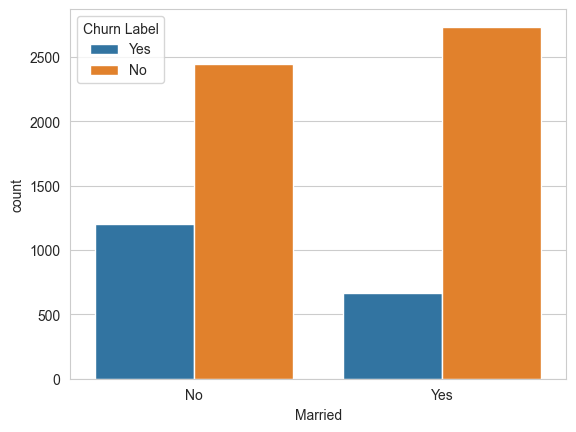

In [30]:
telecom_func(telco_df,'Married')

In [31]:
#vamos substituir No-0 e Yes-1  

telco_final_df['Married']=telco_df['Married'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\652699583.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Married']=telco_df['Married'].replace(['No','Yes'],[0,1])


### 9. Dependents

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Dependents
No     5416
Yes    1627
Name: count, dtype: int64


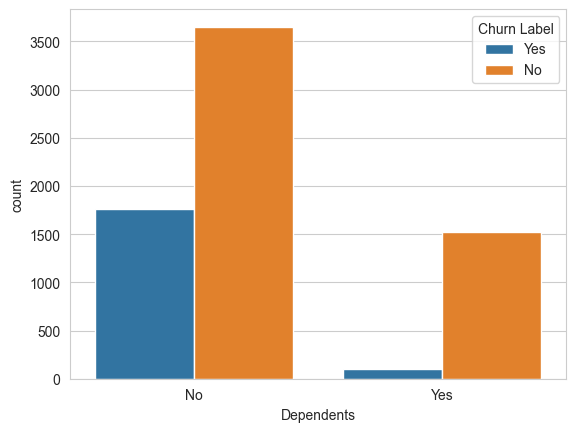

In [32]:
telecom_func(telco_df,'Dependents')

Customers that dont have any dependents, are the ones that churn the most.

In [33]:
#vamos substituir No-0 e Yes-1  

telco_final_df['Dependents']=telco_df['Dependents'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\2190702113.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Dependents']=telco_df['Dependents'].replace(['No','Yes'],[0,1])


In [34]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents
0,1,0,71-80,1,0,0
1,1,1,71-80,1,1,1
2,1,0,61-71,1,0,1
3,1,1,71-80,1,1,1
4,1,1,71-80,1,1,1
...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0
7039,0,0,31-41,0,1,1
7040,0,1,21-31,0,1,1
7041,0,1,31-41,0,1,1


### 10. Number of Dependents

Qty of unique values: 10

Which are the unique values: [0 1 3 2 5 4 6 7 8 9]
\Qty of null values: 0
\Qty per option (sorted):
Number of Dependents
0    5416
1     553
2     531
3     517
4       9
5      10
6       3
7       2
8       1
9       1
Name: count, dtype: int64


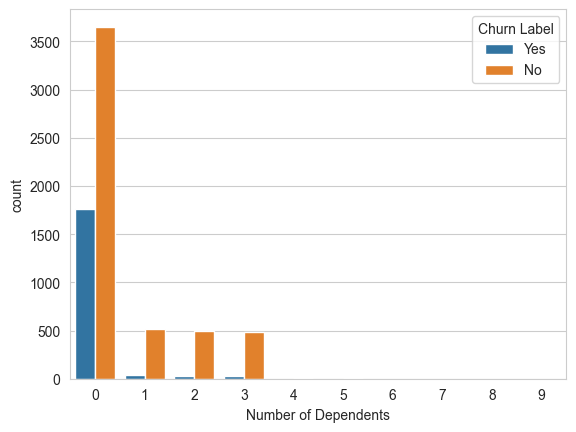

In [35]:
telecom_func(telco_df,'Number of Dependents')

From 4 to 9 dependents the number is considerably low. I will simplify and group that range into one category, and there will be in total 5 categories in this column

In [36]:
#telco_final_df['Nr of Dependents'] = telco_df['Number of Dependents']
telco_final_df['Nr of Dependents'] = [ n if n <= 3 else 4 for n in telco_df['Number of Dependents']]
#telco_final_df['Nr of Dependents'] = [    0 if n == 0 else (1 if 1 <= n <= 3 else 2) for n in telco_df['Number of Dependents']]


Qty of unique values: 5

Which are the unique values: [0 1 3 2 4]
\Qty of null values: 0
\Qty per option (sorted):
Nr of Dependents
0    5416
1     553
2     531
3     517
4      26
Name: count, dtype: int64


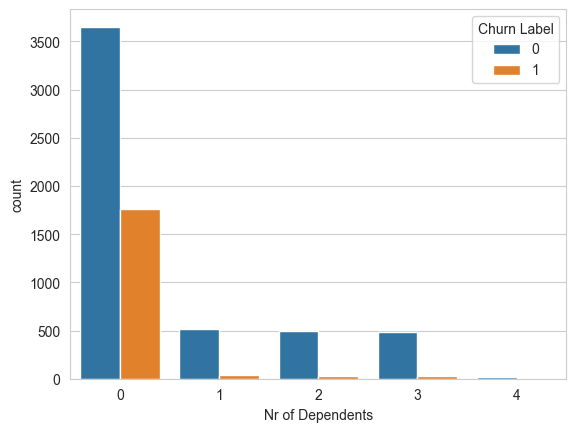

In [37]:
#Para confirmar que houve agrupamento de uma 5a categoria
telecom_func(telco_final_df,'Nr of Dependents')

In [38]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents
0,1,0,71-80,1,0,0,0
1,1,1,71-80,1,1,1,1
2,1,0,61-71,1,0,1,3
3,1,1,71-80,1,1,1,1
4,1,1,71-80,1,1,1,1
...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0
7039,0,0,31-41,0,1,1,2
7040,0,1,21-31,0,1,1,2
7041,0,1,31-41,0,1,1,2


### 11. Country

Qty of unique values: 1

Which are the unique values: ['United States']
\Qty of null values: 0
\Qty per option:
Country
United States    7043
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


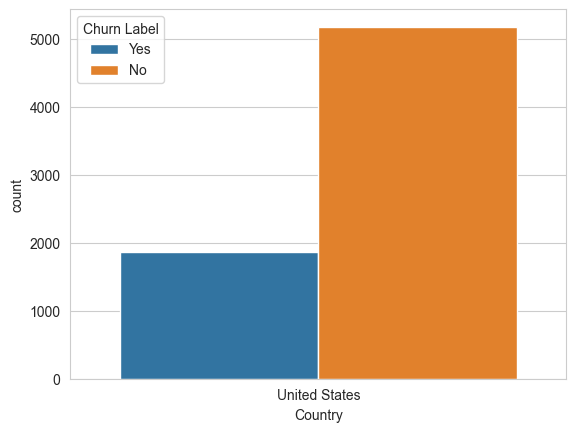

In [39]:
telecom_func(telco_df,'Country') 

Irrelevant feature, there is only 1 category, it wont add any new information to the model

### 12. State

Qty of unique values: 1

Which are the unique values: ['California']
\Qty of null values: 0
\Qty per option:
State
California    7043
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


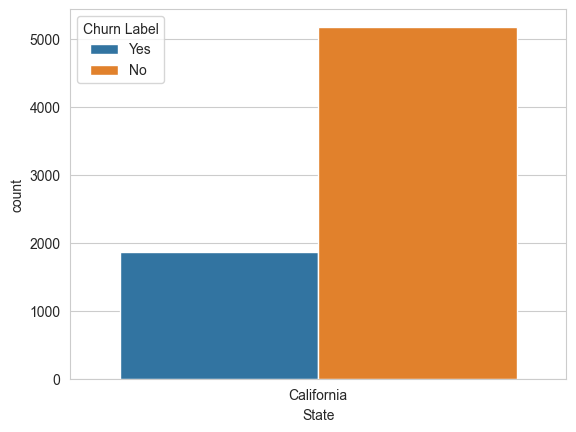

In [40]:
telecom_func(telco_df,'State')

Irrelevant feature, there is only 1 category, it wont add any new information to the model

### 13. City

Qty of unique values: 1106

Which are the unique values: ['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']
\Qty of null values: 0
\Qty per option:
City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


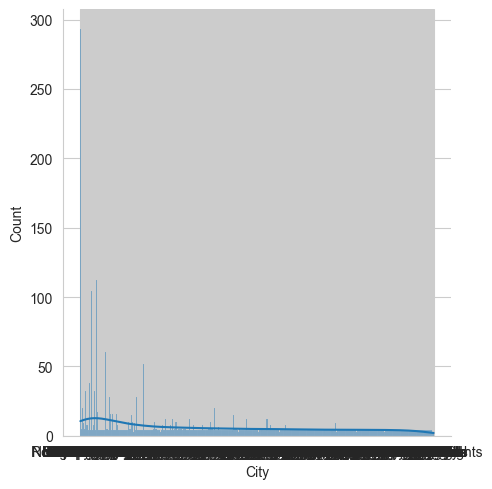

In [41]:
telecom_func(telco_df,'City', False)

In [42]:
#print(telco_df['City'].value_counts(dropna=False).to_string())

In [43]:
telco_final_df['City']=telco_df['City']

In [44]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City
0,1,0,71-80,1,0,0,0,Los Angeles
1,1,1,71-80,1,1,1,1,Los Angeles
2,1,0,61-71,1,0,1,3,Los Angeles
3,1,1,71-80,1,1,1,1,Inglewood
4,1,1,71-80,1,1,1,1,Whittier
...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers
7039,0,0,31-41,0,1,1,2,Adelanto
7040,0,1,21-31,0,1,1,2,Amboy
7041,0,1,31-41,0,1,1,2,Angelus Oaks


In [45]:
#Tinha visto Johannesburg, mas afinal de contas na california tem esse lugar too 

'''
for city in telco_df['City'].unique().tolist():
    print(city)
'''

"\nfor city in telco_df['City'].unique().tolist():\n    print(city)\n"

### 13.1. New attribute: CityArea

This feature is a result of the mapping of city and area (urban or rural)

In [46]:
city_groups={ 

    'Los Angeles': 'urban',

    'Inglewood': 'urban',

    'Whittier': 'urban',

    'Pico Rivera': 'urban',

    'Los Alamitos': 'urban',

    'Sierra Madre': 'urban',

    'Pasadena': 'urban',

    'North Hollywood': 'urban',

    'Covina': 'urban',

    'El Monte': 'urban',

    'La Puente': 'urban',

    'Rowland Heights': 'urban',

    'Ontario': 'urban',

    'Alpine': 'rural',

    'San Diego': 'urban',

    'Thermal': 'rural',

    'Riverside': 'urban',

    'Hemet': 'urban',

    'Moreno Valley': 'urban',

    'Perris': 'urban',

    'Anaheim': 'urban',

    'Brea': 'urban',

    'Yorba Linda': 'urban',

    'Summerland': 'rural',

    'Santa Barbara': 'urban',

    'Alpaugh': 'rural',

    'Camp Nelson': 'rural',

    'Delano': 'urban',

    'Fellows': 'rural',

    'Temecula': 'urban',

    'Biola': 'rural',

    'Selma': 'urban',

    'Squaw Valley': 'rural',

    'Fresno': 'urban',

    'Jolon': 'rural',

    'San Francisco': 'urban',

    'Palo Alto': 'urban',

    'Birds Landing': 'rural',

    'Byron': 'rural',

    'Fremont': 'urban',

    'Livermore': 'urban',

    'Napa': 'urban',

    'Pleasanton': 'urban',

    'San Ramon': 'urban',

    'Berkeley': 'urban',

    'Greenbrae': 'urban',

    'Forest Knolls': 'rural',

    'Freedom': 'rural',

    'Gilroy': 'urban',

    'Los Gatos': 'urban',

    'San Jose': 'urban',

    'Glencoe': 'rural',

    'Columbia': 'rural',

    'Escondido': 'urban',

    'Lakewood': 'urban',

    'Fulton': 'rural',

    'Nice': 'rural',

    'Alderpoint': 'rural',

    'Bayside': 'rural',

    'Loleta': 'rural',

    'Rio Dell': 'rural',

    'Davis': 'urban',

    'Folsom': 'urban',

    'Madison': 'rural',

    'Pleasant Grove': 'rural',

    'Sheridan': 'rural',

    'Wheatland': 'rural',

    'Rancho Cordova': 'urban',

    'Canyon Dam': 'rural',

    'Dobbins': 'rural',

    'Forest Ranch': 'rural',

    'Grass Valley': 'urban',

    'Nevada City': 'urban',

    'Fallbrook': 'urban',

    'Lewiston': 'rural',

    'Palo Cedro': 'rural',

    'Round Mountain': 'rural',

    'Hermosa Beach': 'urban',

    'Buena Park': 'urban',

    'Long Beach': 'urban',

    'South Pasadena': 'urban',

    'Glendale': 'urban',

    'Reseda': 'urban',

    'Sylmar': 'urban',

    'Burbank': 'urban',

    'Chino': 'urban',

    'Claremont': 'urban',

    'Desert Center': 'rural',

    'Wrightwood': 'rural',

    'Murrieta': 'urban',

    'Nuevo': 'rural',

    'Irvine': 'urban',

    'Corona Del Mar': 'urban',

    'Midway City': 'urban',

    'Newport Beach': 'urban',

    'Santa Ana': 'urban',

    'Oak View': 'rural',

    'Terra Bella': 'rural',

    'Bradley': 'rural',

    'Nipomo': 'rural',

    'Lee Vining': 'rural',

    'Palmdale': 'urban',

    'Clovis': 'urban',

    'Cutler': 'rural',

    'Dunlap': 'rural',

    'Fowler': 'urban',

    'South Dos Palos': 'rural',

    'Tranquillity': 'rural',

    'Lockwood': 'rural',

    'Marina': 'urban',

    'San Lucas': 'rural',

    'Daly City': 'urban',

    'San Mateo': 'urban',

    'Concord': 'urban',

    'Hayward': 'urban',

    'El Sobrante': 'urban',

    'San Rafael': 'urban',

    'Novato': 'urban',

    'Stinson Beach': 'rural',

    'Moss Landing': 'rural',

    'Stockton': 'urban',

    'Angels Camp': 'rural',

    'Sheep Ranch': 'rural',

    'Ballico': 'rural',

    'Catheys Valley': 'rural',

    'Hickman': 'rural',

    'Soulsbyville': 'rural',

    'Branscomb': 'rural',

    'Philo': 'rural',

    'Point Arena': 'rural',

    'Westport': 'rural',

    'Gasquet': 'rural',

    'Piercy': 'rural',

    'Carmichael': 'urban',

    'Citrus Heights': 'urban',

    'Herald': 'rural',

    'Newcastle': 'rural',

    'Roseville': 'urban',

    'Applegate': 'rural',

    'Sacramento': 'urban',

    'Butte City': 'rural',

    'Clipper Mills': 'rural',

    'Quincy': 'rural',

    'Sutter': 'rural',

    'Twain': 'rural',

    'Adin': 'rural',

    'Paskenta': 'rural',

    'Red Bluff': 'rural',

    'Doyle': 'rural',

    'Sierra City': 'rural',

    'Tahoe Vista': 'rural',

    'Culver City': 'urban',

    'Gardena': 'urban',

    'Torrance': 'urban',

    'Montebello': 'urban',

    'Arcadia': 'urban',

    'Canoga Park': 'urban',

    'Stevenson Ranch': 'urban',

    'Castaic': 'urban',

    'Van Nuys': 'urban',

    'West Covina': 'urban',

    'Campo': 'rural',

    'Chula Vista': 'urban',

    'Spring Valley': 'urban',

    'Bonsall': 'rural',

    'Pala': 'rural',

    'Pauma Valley': 'rural',

    'Vista': 'urban',

    'Indian Wells': 'urban',

    'Desert Hot Springs': 'urban',

    'North Palm Springs': 'rural',

    'Crestline': 'rural',

    'Lucerne Valley': 'rural',

    'Redlands': 'urban',

    'Running Springs': 'rural',

    'Victorville': 'urban',

    'San Bernardino': 'urban',

    'Lake Elsinore': 'urban',

    'Camarillo': 'urban',

    'Somis': 'rural',

    'Coalinga': 'rural',

    'Ducor': 'rural',

    'Huron': 'rural',

    'Mc Kittrick': 'rural',

    'Visalia': 'urban',

    'Woody': 'rural',

    'Boron': 'rural',

    'Helm': 'rural',

    'Parlier': 'urban',

    'Half Moon Bay': 'urban',

    'Loma Mar': 'rural',

    'Atherton': 'urban',

    'Crockett': 'urban',

    'Fairfield': 'urban',

    'Pinole': 'urban',

    'Port Costa': 'rural',

    'Vallejo': 'urban',

    'Oakland': 'urban',

    'San Pablo': 'urban',

    'Corte Madera': 'urban',

    'Point Reyes Station': 'rural',

    'Boulder Creek': 'rural',

    'Morgan Hill': 'urban',

    'Murphys': 'rural',

    'Crows Landing': 'rural',

    'Merced': 'urban',

    'Modesto': 'urban',

    'Winton': 'rural',

    'Cobb': 'rural',

    'Mendocino': 'rural',

    'Blue Lake': 'rural',

    'Fair Oaks': 'urban',

    'Grizzly Flats': 'rural',

    'Guinda': 'rural',

    'Loomis': 'urban',

    'Pioneer': 'rural',

    'Soda Springs': 'rural',

    'Chico': 'urban',

    'Elk Creek': 'rural',

    'Grimes': 'rural',

    'Princeton': 'rural',

    'Williams': 'rural',

    'Yuba City': 'urban',

    'Anderson': 'urban',

    'Big Bend': 'rural',

    'Hat Creek': 'rural',

    'Shingletown': 'rural',

    'Weaverville': 'rural',

    'Downey': 'urban',

    'Huntington Park': 'urban',

    'Malibu': 'urban',

    'Pacific Palisades': 'urban',

    'San Pedro': 'urban',

    'Montrose': 'urban',

    'San Marino': 'urban',

    'Canyon Country': 'urban',

    'Azusa': 'urban',

    'Pomona': 'urban',

    'Rosemead': 'urban',

    'Yucaipa': 'rural',

    'San Jacinto': 'rural',

    'Dana Point': 'urban',

    'Lake Forest': 'urban',

    'Huntington Beach': 'urban',

    'Laguna Beach': 'urban',

    'Moorpark': 'urban',

    'Simi Valley': 'urban',

    'Avenal': 'rural',

    'Exeter': 'rural',

    'New Cuyama': 'rural',

    'San Luis Obispo': 'urban',

    'Los Alamos': 'rural',

    'Oceano': 'rural',

    'Pismo Beach': 'urban',

    'Big Pine': 'rural',

    'Johannesburg': 'rural',

    'Dinuba': 'urban',

    'Madera': 'urban',

    'Shaver Lake': 'rural',

    'Chualar': 'rural',

    'Portola Valley': 'urban',

    'Redwood City': 'urban',

    'Martinez': 'urban',

    'Moraga': 'urban',

    'Oakley': 'urban',

    'Emeryville': 'urban',

    'Richmond': 'urban',

    'Larkspur': 'urban',

    'Ben Lomond': 'rural',

    'Campbell': 'urban',

    'Davenport': 'rural',

    'Vallecito': 'rural',

    'Woodbridge': 'urban',

    'Delhi': 'rural',

    'Riverbank': 'urban',

    'Santa Rosa': 'urban',

    'Clearlake': 'rural',

    'Lakeport': 'rural',

    'Lucerne': 'rural',

    'The Sea Ranch': 'rural',

    'Bridgeville': 'rural',

    'Garberville': 'rural',

    'Auburn': 'urban',

    'Lotus': 'rural',

    'Mather': 'rural',

    'Sloughhouse': 'rural',

    'Brownsville': 'rural',

    'Forbestown': 'rural',

    'Redding': 'urban',

    'Shasta Lake': 'urban',

    'Hornbrook': 'rural',

    'Mineral': 'rural',

    'Trinity Center': 'rural',

    'Bellflower': 'urban',

    'Paramount': 'urban',

    'La Canada Flintridge': 'urban',

    'Pacoima': 'urban',

    'Valencia': 'urban',

    'Thousand Oaks': 'urban',

    'Sherman Oaks': 'urban',

    'Rancho Cucamonga': 'urban',

    'Glendora': 'urban',

    'San Gabriel': 'urban',

    'Alhambra': 'urban',

    'Mount Laguna': 'rural',

    'San Marcos': 'urban',

    'El Centro': 'urban',

    'Hawthorne': 'urban',

    'Redondo Beach': 'urban',

    'Santa Monica': 'urban',

    'Artesia': 'urban',

    'Sunset Beach': 'urban',

    'Baldwin Park': 'urban',

    'Chino Hills': 'urban',

    'Hacienda Heights': 'urban',

    'La Verne': 'urban',

    'Descanso': 'rural',

    'Pine Valley': 'rural',

    'Julian': 'rural',

    'La Jolla': 'urban',

    'Rancho Santa Fe': 'urban',

    'Warner Springs': 'rural',

    'San Ysidro': 'urban',

    'Cabazon': 'rural',

    'Calexico': 'urban',

    'Cathedral City': 'urban',

    'Morongo Valley': 'rural',

    'Palo Verde': 'rural',

    'Westmorland': 'rural',

    'White Water': 'rural',

    'Bloomington': 'urban',

    'Fontana': 'urban',

    'Mentone': 'rural',

    'Nipton': 'rural',

    'Pinon Hills': 'rural',

    'Shoshone': 'rural',

    'Yermo': 'rural',

    'Menifee': 'urban',

    'Winchester': 'rural',

    'Foothill Ranch': 'urban',

    'Fountain Valley': 'urban',

    'Oxnard': 'urban',

    'Buttonwillow': 'rural',

    'Pixley': 'rural',

    'Strathmore': 'rural',

    'Woodlake': 'rural',

    'Bakersfield': 'urban',

    'Creston': 'rural',

    'Los Olivos': 'rural',

    'Santa Ynez': 'rural',

    'Shandon': 'rural',

    'Benton': 'rural',

    'Bishop': 'urban',

    'O Neals': 'rural',

    'Los Altos': 'urban',

    'Millbrae': 'urban',

    'Montara': 'rural',

    'Pacifica': 'urban',

    'Bethel Island': 'rural',

    'El Cerrito': 'urban',

    'Travis Afb': 'urban',

    'Yountville': 'rural',

    'Penngrove': 'rural',

    'Brookdale': 'rural',

    'Castroville': 'urban',

    'Farmington': 'rural',

    'Hathaway Pines': 'rural',

    'Lodi': 'urban',

    'Wallace': 'rural',

    'El Nido': 'rural',

    'Hughson': 'urban',

    'Waterford': 'rural',

    'Albion': 'rural',

    'Dos Rios': 'rural',

    'Glen Ellen': 'rural',

    'Glenhaven': 'rural',

    'Kelseyville': 'rural',

    'Laytonville': 'rural',

    'Manchester': 'rural',

    'Redwood Valley': 'rural',

    'Elverta': 'rural',

    'Shingle Springs': 'urban',

    'Vacaville': 'urban',

    'Camino': 'rural',

    'Pollock Pines': 'rural',

    'Beale Afb': 'urban',

    'Camptonville': 'rural',

    'Colusa': 'rural',

    'Glenn': 'rural',

    'Greenville': 'rural',

    'Live Oak': 'rural',

    'Canby': 'rural',

    'Forks Of Salmon': 'rural',

    'Greenview': 'rural',

    'Junction City': 'rural',

    'Lookout': 'rural',

    'Macdoel': 'rural',

    'Madeline': 'rural',

    'Milford': 'rural',

    'Olympic Valley': 'rural',

    'Compton': 'urban',

    'La Mirada': 'urban',

    'Cerritos': 'urban',

    'Northridge': 'urban',

    'Sun Valley': 'urban',

    'Tarzana': 'urban',

    'Valley Village': 'urban',

    'Monterey Park': 'urban',

    'Borrego Springs': 'rural',

    'Indio': 'urban',

    'Brawley': 'urban',

    'Parker Dam': 'rural',

    'Twentynine Palms': 'rural',

    'Yucca Valley': 'rural',

    'Wildomar': 'urban',

    'Costa Mesa': 'urban',

    'Rancho Santa Margarita': 'urban',

    'Ladera Ranch': 'urban',

    'Tustin': 'urban',

    'Fullerton': 'urban',

    'Garden Grove': 'urban',

    'Orange': 'urban',

    'Placentia': 'urban',

    'Ojai': 'rural',

    'Port Hueneme': 'urban',

    'California Hot Springs': 'rural',

    'Ivanhoe': 'rural',

    'Lost Hills': 'rural',

    'Porterville': 'urban',

    'Stratford': 'rural',

    'Weldon': 'rural',

    'Avila Beach': 'rural',

    'Lompoc': 'urban',

    'San Miguel': 'rural',

    'California City': 'urban',

    'Acton': 'rural',

    'Bridgeport': 'rural',

    'Ahwahnee': 'rural',

    'Big Creek': 'rural',

    'Friant': 'rural',

    'Kingsburg': 'urban',

    'Lakeshore': 'rural',

    'Sultana': 'rural',

    'Salinas': 'urban',

    'Menlo Park': 'urban',

    'South San Francisco': 'urban',

    'Castro Valley': 'urban',

    'Pittsburg': 'urban',

    'Rio Vista': 'urban',

    'Dillon Beach': 'rural',

    'Nicasio': 'rural',

    'San Quentin': 'rural',

    'Felton': 'urban',

    'French Camp': 'rural',

    'Cressey': 'rural',

    'La Grange': 'rural',

    'Midpines': 'rural',

    'Mi Wuk Village': 'rural',

    'Turlock': 'urban',

    'Twain Harte': 'rural',

    'Cazadero': 'rural',

    'Elk': 'rural',

    'Ferndale': 'rural',

    'Miranda': 'rural',

    'Somes Bar': 'rural',

    'Capay': 'rural',

    'Courtland': 'rural',

    'Dixon': 'urban',

    'Elmira': 'rural',

    'Jackson': 'urban',

    'Lincoln': 'urban',

    'Berry Creek': 'rural',

    'Penn Valley': 'rural',

    'Hamilton City': 'rural',

    'Meadow Valley': 'rural',

    'Flournoy': 'rural',

    'Los Molinos': 'rural',

    'Seiad Valley': 'rural',

    'Shasta': 'rural',

    'Beverly Hills': 'urban',

    'Wilmington': 'urban',

    'Carson': 'urban',

    'Sunland': 'urban',

    'West Hills': 'urban',

    'Santa Clarita': 'urban',

    'Westlake Village': 'urban',

    'South El Monte': 'urban',

    'Upland': 'urban',

    'Potrero': 'rural',

    'Tecate': 'rural',

    'Carlsbad': 'urban',

    'El Cajon': 'urban',

    'Lakeside': 'urban',

    'Palomar Mountain': 'rural',

    'Ramona': 'rural',

    'Santee': 'urban',

    'Valley Center': 'rural',

    'Palm Desert': 'urban',

    'Adelanto': 'urban',

    'Daggett': 'rural',

    'Aguanga': 'rural',

    'Norco': 'urban',

    'Corona': 'urban',

    'Armona': 'rural',

    'Earlimart': 'rural',

    'Kettleman City': 'rural',

    'Posey': 'rural',

    'Springville': 'rural',

    'Cambria': 'rural',

    'Caliente': 'rural',

    'Olancha': 'rural',

    'Randsburg': 'rural',

    'Prather': 'rural',

    'Raisin City': 'rural',

    'Carmel': 'rural',

    'Burlingame': 'urban',

    'Mountain View': 'urban',

    'San Gregorio': 'rural',

    'Newark': 'urban',

    'Saint Helena': 'rural',

    'San Leandro': 'urban',

    'Petaluma': 'urban',

    'San Martin': 'rural',

    'Scotts Valley': 'urban',

    'Denair': 'rural',

    'Hilmar': 'rural',

    'Long Barn': 'rural',

    'Patterson': 'rural',

    'Snelling': 'rural',

    'Healdsburg': 'urban',

    'Occidental': 'rural',

    'Yorkville': 'rural',

    'Honeydew': 'rural',

    'Hydesville': 'rural',

    'Klamath': 'rural',

    'Redway': 'rural',

    'Salyer': 'rural',

    'Greenwood': 'rural',

    'Isleton': 'rural',

    'Knights Landing': 'rural',

    'Pilot Hill': 'rural',

    'Pine Grove': 'rural',

    'Rio Linda': 'urban',

    'Twin Bridges': 'rural',

    'Granite Bay': 'urban',

    'Challenge': 'rural',

    'Dunnigan': 'rural',

    'North San Juan': 'rural',

    'Palermo': 'rural',

    'Willows': 'rural',

    'Burney': 'rural',

    'Corning': 'rural',

    'Dorris': 'rural',

    'Igo': 'rural',

    'Montgomery Creek': 'rural',

    'Mount Shasta': 'rural',

    'Vina': 'rural',

    'Likely': 'rural',

    'Portola': 'rural',

    'Ravendale': 'rural',

    'Standish': 'rural',

    'Tahoe City': 'rural',

    'South Gate': 'urban',

    'Agoura Hills': 'urban',

    'Newhall': 'urban',

    'La Mesa': 'urban',

    'Lemon Grove': 'urban',

    'National City': 'urban',

    'Del Mar': 'urban',

    'Ranchita': 'rural',

    'Santa Ysabel': 'rural',

    'Pioneertown': 'rural',

    'Helendale': 'rural',

    'Lytle Creek': 'rural',

    'Oro Grande': 'rural',

    'San Clemente': 'urban',

    'Laguna Niguel': 'urban',

    'Ventura': 'urban',

    'Frazier Park': 'rural',

    'Lamont': 'urban',

    'Lindsay': 'urban',

    'Atascadero': 'rural',

    'Santa Maria': 'urban',

    'Edwards': 'rural',

    'Keeler': 'rural',

    'Lancaster': 'urban',

    'Tehachapi': 'rural',

    'Bass Lake': 'rural',

    'Cantua Creek': 'rural',

    'Caruthers': 'rural',

    'Chowchilla': 'rural',

    'Del Rey': 'rural',

    'Five Points': 'rural',

    'Kerman': 'urban',

    'Monterey': 'urban',

    'Alameda': 'urban',

    'Alamo': 'rural',

    'Orinda': 'urban',

    'Cotati': 'urban',

    'Aromas': 'rural',

    'Santa Cruz': 'urban',

    'Saratoga': 'urban',

    'Copperopolis': 'rural',

    'Big Oak Flat': 'rural',

    'Coulterville': 'rural',

    'El Portal': 'rural',

    'Gustine': 'rural',

    'Le Grand': 'rural',

    'Newman': 'rural',

    'Ripon': 'urban',

    'Salida': 'rural',

    'Middletown': 'rural',

    'Witter Springs': 'rural',

    'Fields Landing': 'rural',

    'Redcrest': 'rural',

    'Somerset': 'rural',

    'Woodland': 'urban',

    'Durham': 'rural',

    'Paradise': 'rural',

    'Hyampom': 'rural',

    'Klamath River': 'rural',

    'Lakehead': 'rural',

    'Davis Creek': 'rural',

    'Tahoma': 'rural',

    'Granada Hills': 'urban',

    'Encino': 'urban',

    'Studio City': 'urban',

    'Earp': 'rural',

    'Thousand Palms': 'urban',

    'Lynwood': 'urban',

    'Marina Del Rey': 'urban',

    'La Habra': 'urban',

    'Avalon': 'rural',

    'Harbor City': 'urban',

    'Altadena': 'urban',

    'Monrovia': 'urban',

    'Tujunga': 'urban',

    'Mission Hills': 'urban',

    'San Dimas': 'urban',

    'Seeley': 'rural',

    'Ludlow': 'rural',

    'Phelan': 'rural',

    'Rialto': 'urban',

    'March Air Reserve Base': 'rural',

    'Homeland': 'rural', 

    'Idyllwild': 'rural',

    'Sun City': 'urban',

    'Bodfish': 'rural',

    'Kernville': 'rural',

    'Lemon Cove': 'rural',

    'Shafter': 'urban',

    'Keene': 'rural',

    'Pearblossom': 'rural',

    'Miramonte': 'rural',

    'Orosi': 'rural',

    'San Joaquin': 'rural',

    'Tollhouse': 'rural',

    'King City': 'urban',

    'Pebble Beach': 'urban',

    'Belmont': 'urban',

    'Pescadero': 'rural',

    'San Bruno': 'urban',

    'Sunnyvale': 'urban',

    'Antioch': 'urban',

    'San Lorenzo': 'urban',

    'Union City': 'urban',

    'Walnut Creek': 'urban',

    'Albany': 'urban',

    'Bodega Bay': 'rural',

    'Marshall': 'rural',

    'San Anselmo': 'urban',

    'Sausalito': 'urban',

    'Tomales': 'rural',

    'Valley Ford': 'rural',

    'Alviso': 'urban',

    'Acampo': 'rural',

    'Linden': 'rural',

    'Valley Springs': 'rural',

    'West Point': 'rural',

    'Atwater': 'urban',

    'Mariposa': 'rural',

    'Oakdale': 'urban',

    'Caspar': 'rural',

    'Cloverdale': 'urban',

    'Comptche': 'rural',

    'Gualala': 'rural',

    'Rio Nido': 'rural',

    'Ukiah': 'urban',

    'Mckinleyville': 'urban',

    'Korbel': 'rural',

    'Smith River': 'rural',

    'Trinidad': 'rural',

    'Amador City': 'rural',

    'Diamond Springs': 'rural',

    'Elk Grove': 'urban',

    'Orangevale': 'urban',

    'Penryn': 'rural',

    'Plymouth': 'rural',

    'Winters': 'rural',

    'Colfax': 'rural',

    'Meadow Vista': 'rural',

    'Antelope': 'urban',

    'Arbuckle': 'rural',

    'Bangor': 'rural',

    'Magalia': 'rural',

    'Oroville': 'urban',

    'Strawberry Valley': 'rural',

    'Callahan': 'rural',

    'Cottonwood': 'rural',

    'Douglas City': 'rural',

    'Fall River Mills': 'rural',

    'Nubieber': 'rural',

    'La Palma': 'urban',

    'Stanton': 'urban',

    'Lomita': 'urban',

    'Seal Beach': 'urban',

    'Porter Ranch': 'urban',

    'Walnut': 'urban',

    'Coronado': 'urban',

    'Banning': 'urban',

    'Heber': 'rural',

    'La Quinta': 'urban',

    'Rancho Mirage': 'urban',

    'Amboy': 'rural',

    'Angelus Oaks': 'rural',

    'Apple Valley': 'urban',

    'Baker': 'rural',

    'Cedar Glen': 'rural',

    'Colton': 'urban',

    'Fawnskin': 'rural',

    'Sugarloaf': 'rural',

    'Anza': 'rural',

    'Newport Coast': 'urban',

    'Trabuco Canyon': 'rural',

    'Piru': 'rural',

    'Santa Paula': 'urban',

    'Taft': 'urban',

    'Los Osos': 'rural',

    'Buellton': 'urban',

    'Morro Bay': 'urban',

    'Templeton': 'rural',

    'Independence': 'rural',

    'Rosamond': 'rural',

    'Hume': 'rural',

    'North Fork': 'rural',

    'Oakhurst': 'rural',

    'Traver': 'rural',

    'Carmel Valley': 'rural',

    'Brisbane': 'urban',

    'Pleasant Hill': 'urban',

    'Danville': 'urban',

    'Pope Valley': 'rural',

    'Dublin': 'urban',

    'Rodeo': 'urban',

    'Deer Park': 'rural',

    'Sunol': 'rural',

    'Inverness': 'rural',

    'Mill Valley': 'urban',

    'San Juan Bautista': 'rural',

    'Santa Clara': 'urban',

    'Avery': 'rural',

    'Mountain Ranch': 'rural',

    'Planada': 'rural',

    'Clearlake Oaks': 'rural',

    'Covelo': 'rural',

    'Eldridge': 'rural',

    'Guerneville': 'rural',

    'Jenner': 'rural',

    'Eureka': 'urban',

    'West Sacramento': 'urban',

    'Brooks': 'rural',

    'El Dorado': 'rural',

    'Garden Valley': 'rural',

    'Nicolaus': 'rural',

    'Rio Oso': 'rural',

    'Thornton': 'rural',

    'Dutch Flat': 'rural',

    'Echo Lake': 'rural',

    'Weimar': 'rural',

    'Downieville': 'rural',

    'Rough And Ready': 'rural',

    'Bieber': 'rural',

    'Oak Run': 'rural',

    'Old Station': 'rural',

    'Whitmore': 'rural',

    'Blairsden Graeagle': 'rural',

    'Eagleville': 'rural',

    'Fort Bidwell': 'rural',

    'Sierraville': 'rural',

    'Westwood': 'rural',

    'South Lake Tahoe': 'urban',

    'Lawndale': 'urban',

    'Santa Fe Springs': 'urban',

    'Chatsworth': 'urban',

    'Mira Loma': 'urban',

    'Bonita': 'urban',

    'Guatay': 'rural',

    'Oceanside': 'urban',

    'Palm Springs': 'urban',

    'Big Bear City': 'rural',

    'Calimesa': 'rural',

    'Green Valley Lake': 'rural',

    'Hinkley': 'rural',

    'Silverado': 'rural',

    'Carpinteria': 'urban',

    'Lemoore': 'urban',

    'Sequoia National Park': 'rural',

    'Wasco': 'urban',

    'Casmalia': 'rural',

    'Guadalupe': 'urban',

    'Lake Hughes': 'rural',

    'Valyermo': 'rural',

    'Sanger': 'urban',

    'Pacific Grove': 'urban',

    'Seaside': 'urban',

    'Calistoga': 'urban',

    'Lafayette': 'urban',

    'Bolinas': 'rural',

    'Capitola': 'urban',

    'Cupertino': 'urban',

    'Milpitas': 'urban',

    'Arnold': 'rural',

    'Campo Seco': 'rural',

    'Clements': 'rural',

    'Lockeford': 'rural',

    'Lathrop': 'urban',

    'Pinecrest': 'rural',

    'Stevinson': 'rural',

    'Vernalis': 'rural',

    'Sonoma': 'urban',

    'Hoopa': 'rural',

    'Myers Flat': 'rural',

    'Samoa': 'rural',

    'Zenia': 'rural',

    'Clarksburg': 'rural',

    'Galt': 'urban',

    'Hood': 'rural',

    'Walnut Grove': 'rural',

    'Emigrant Gap': 'rural',

    'Browns Valley': 'rural',

    'Crescent Mills': 'rural',

    'Maxwell': 'rural',

    'Olivehurst': 'urban',

    'Bella Vista': 'rural',

    'Castella': 'rural',

    'Happy Camp': 'rural',

    'Paynes Creek': 'rural',

    'Susanville': 'urban',

    'Termo': 'rural',

    'Carnelian Bay': 'rural',

    'Kings Beach': 'urban',

    'El Segundo': 'urban',

    'Topanga': 'urban',

    'Venice': 'urban',

    'Duarte': 'urban',

    'Woodland Hills': 'urban',

    'Capistrano Beach': 'urban',

    'Mission Viejo': 'urban',

    'Corcoran': 'urban',

    'Farmersville': 'urban',

    'Lebec': 'rural',

    'Richgrove': 'rural',

    'Tulare': 'urban',

    'Solvang': 'urban',

    'Mojave': 'rural',

    'Badger': 'rural',

    'Riverdale': 'urban',

    'Carmel By The Sea': 'urban',

    'Greenfield': 'urban',

    'Angwin': 'rural',

    'Clayton': 'urban',

    'Rohnert Park': 'urban',

    'Olema': 'rural',

    'Woodacre': 'rural',

    'Aptos': 'urban',

    'Watsonville': 'urban',

    'Groveland': 'rural',

    'Jamestown': 'rural',

    'Livingston': 'urban',

    'Tuolumne': 'rural',

    'Annapolis': 'rural',

    'Graton': 'rural',

    'Hopland': 'rural',

    'Navarro': 'rural',

    'Burnt Ranch': 'rural',

    'Petrolia': 'rural',

    'Cool': 'rural',

    'Kirkwood': 'rural',

    'Rescue': 'rural',

    'Sutter Creek': 'rural',

    'Wilton': 'rural',

    'Kyburz': 'rural',

    'Gridley': 'urban',

    'Orland': 'rural',

    'Taylorsville': 'rural',

    'Cassel': 'rural',

    'Dunsmuir': 'rural',

    'Etna': 'rural',

    'Mcarthur': 'rural',

    'Mill Creek': 'rural',

    'Platina': 'rural',

    'Wendel': 'rural',

    'Homewood': 'rural',

    'West Hollywood': 'urban',

    'Hawaiian Gardens': 'urban',

    'Winnetka': 'urban',

    'San Fernando': 'urban',

    'North Hills': 'urban',

    'Montclair': 'urban',

    'Imperial Beach': 'urban',

    'Encinitas': 'urban',

    'Poway': 'urban',

    'Solana Beach': 'urban',

    'Beaumont': 'urban',

    'Calipatria': 'rural',

    'Imperial': 'urban',

    'Ocotillo': 'rural',

    'Bell': 'urban',

    'Manhattan Beach': 'urban',

    'Maywood': 'urban',

    'Palos Verdes Peninsula': 'urban',

    'Rancho Palos Verdes': 'urban',

    'Playa Del Rey': 'urban',

    'Cypress': 'urban',

    'Norwalk': 'urban',

    'Surfside': 'urban',

    'La Crescenta': 'urban',

    'Calabasas': 'urban',

    'Newbury Park': 'urban',

    'Oak Park': 'urban',

    'Mt Baldy': 'rural',

    'Diamond Bar': 'urban',

    'Temple City': 'urban',

    'Dulzura': 'rural',

    'Jamul': 'rural',

    'Cardiff By The Sea': 'urban',

    'Blythe': 'rural',

    'Coachella': 'urban',

    'Joshua Tree': 'rural',

    'Mecca': 'rural',

    'Salton City': 'rural',

    'Winterhaven': 'rural',

    'Landers': 'rural',

    'Fort Irwin': 'rural',

    'Barstow': 'urban',

    'Grand Terrace': 'urban',

    'Big Bear Lake': 'rural',

    'Death Valley': 'rural',

    'Essex': 'rural',

    'Forest Falls': 'rural',

    'Hesperia': 'urban',

    'Highland': 'urban',

    'Lake Arrowhead': 'rural',

    'Loma Linda': 'urban',

    'Needles': 'rural',

    'Mountain Center': 'rural',

    'Laguna Hills': 'urban',

    'Aliso Viejo': 'urban',

    'San Juan Capistrano': 'urban',

    'Westminster': 'urban',

    'Villa Park': 'urban',

    'Fillmore': 'urban',

    'Goleta': 'urban',

    'Arvin': 'urban',

    'Glennville': 'rural',

    'Hanford': 'urban',

    'Lake Isabella': 'rural',

    'Laton': 'rural',

    'Mc Farland': 'urban',

    'Three Rivers': 'rural',

    'Tupman': 'rural',

    'Arroyo Grande': 'urban',

    'Cayucos': 'rural',

    'Grover Beach': 'urban',

    'Paso Robles': 'urban',

    'San Ardo': 'rural',

    'San Simeon': 'rural',

    'Santa Margarita': 'rural',

    'Darwin': 'rural',

    'June Lake': 'rural',

    'Littlerock': 'rural',

    'Llano': 'rural',

    'Mammoth Lakes': 'urban',

    'Auberry': 'rural',

    'Coarsegold': 'rural',

    'Dos Palos': 'urban',

    'Firebaugh': 'urban',

    'Fish Camp': 'rural',

    'Los Banos': 'urban',

    'Orange Cove': 'urban',

    'Raymond': 'rural',

    'Reedley': 'urban',

    'Wishon': 'rural',

    'Gonzales': 'urban',

    'Soledad': 'urban',

    'Spreckels': 'rural',

    'La Honda': 'rural',

    'Moss Beach': 'urban',

    'San Carlos': 'urban',

    'Stanford': 'rural',

    'Benicia': 'urban',

    'Brentwood': 'urban',

    'Hercules': 'urban',

    'Suisun City': 'urban',

    'Belvedere Tiburon': 'urban',

    'Bodega': 'rural',

    'Fairfax': 'urban',

    'Lagunitas': 'rural',

    'San Geronimo': 'rural',

    'Mount Hermon': 'rural',

    'Paicines': 'rural',

    'Soquel': 'rural',

    'Mount Hamilton': 'rural',

    'Burson': 'rural',

    'Mokelumne Hill': 'rural',

    'San Andreas': 'rural',

    'Wilseyville': 'rural',

    'Ceres': 'urban',

    'Escalon': 'urban',

    'Hornitos': 'rural',

    'Keyes': 'urban',

    'Manteca': 'urban',

    'Sonora': 'urban',

    'Tracy': 'urban',

    'Boonville': 'rural',

    'Duncans Mills': 'rural',

    'Forestville': 'rural',

    'Fort Bragg': 'rural',

    'Geyserville': 'rural',

    'Kenwood': 'rural',

    'Little River': 'rural',

    'Lower Lake': 'rural',

    'Monte Rio': 'rural',

    'Potter Valley': 'rural',

    'Sebastopol': 'urban',

    'Upper Lake': 'rural',

    'Willits': 'rural',

    'Windsor': 'urban',

    'Blocksburg': 'rural',

    'Arcata': 'urban',

    'Carlotta': 'rural',

    'Fortuna': 'urban',

    'Kneeland': 'rural',

    'Mad River': 'rural',

    'Orick': 'rural',

    'Orleans': 'rural',

    'Phillipsville': 'rural',

    'Scotia': 'rural',

    'Weott': 'rural',

    'Willow Creek': 'rural',

    'Leggett': 'rural',

    'Esparto': 'rural',

    'Fiddletown': 'rural',

    'Foresthill': 'rural',

    'Georgetown': 'rural',

    'Ione': 'urban',

    'North Highlands': 'urban',

    'Placerville': 'urban',

    'River Pines': 'rural',

    'Rocklin': 'urban',

    'Volcano': 'rural',

    'Alta': 'rural',

    'Gold Run': 'rural',

    'El Dorado Hills': 'urban',

    'Marysville': 'urban',

    'Alleghany': 'rural',

    'Biggs': 'urban',

    'Goodyears Bar': 'rural',

    'Meridian': 'rural',

    'Oregon House': 'rural',

    'Richvale': 'rural',

    'Smartville': 'rural',

    'Stirling City': 'rural',

    'Stonyford': 'rural',

    'Washington': 'rural',

    'Big Bar': 'rural',

    'Chester': 'rural',

    'French Gulch': 'rural',

    'Gazelle': 'rural',

    'Gerber': 'rural',

    'Grenada': 'rural',

    'Mccloud': 'rural',

    'Manton': 'rural',

    'Millville': 'rural',

    'Scott Bar': 'rural',

    'Tehama': 'rural',

    'Weed': 'rural',

    'Yreka': 'urban',

    'Cedarville': 'rural',

    'Chilcoot': 'rural',

    'Clio': 'rural',

    'Coleville': 'rural',

    'Herlong': 'rural',

    'Janesville': 'rural',

    'Litchfield': 'rural',

    'Loyalton': 'rural',

    'Markleeville': 'rural',

    'Calpine': 'rural',

    'Tulelake': 'rural',

    'Boulevard': 'rural',

    'Niland': 'rural',

    'Wofford Heights': 'rural',

    'Alturas': 'rural',

    'Topaz': 'rural',

    'Jacumba': 'rural',

    'Holtville': 'urban'
}

In [47]:
#city_groups 

telco_final_df['CityArea'] = telco_final_df['City'].map(city_groups)
#.replace(['rural','urban'],[0,1])

In [48]:
telco_final_df 

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea
0,1,0,71-80,1,0,0,0,Los Angeles,urban
1,1,1,71-80,1,1,1,1,Los Angeles,urban
2,1,0,61-71,1,0,1,3,Los Angeles,urban
3,1,1,71-80,1,1,1,1,Inglewood,urban
4,1,1,71-80,1,1,1,1,Whittier,urban
...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural
7039,0,0,31-41,0,1,1,2,Adelanto,urban
7040,0,1,21-31,0,1,1,2,Amboy,rural
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural


Qty of unique values: 2

Which are the unique values: ['urban' 'rural']
\Qty of null values: 0
\Qty per option:
CityArea
urban    4521
rural    2522
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


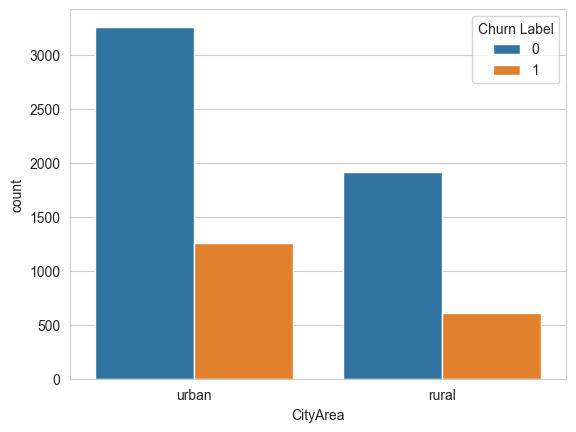

In [49]:
telecom_func(telco_final_df,'CityArea')

### 14. Zip Code

In [50]:
telecom_func(telco_df,'Zip Code')                  

Qty of unique values: 1626

Which are the unique values: [90022 90063 90065 ... 91934 92105 92250]
\Qty of null values: 0
\Qty per option (sorted):
Zip Code
90001    4
90002    4
90003    5
90004    5
90005    4
        ..
96143    4
96145    3
96146    4
96148    4
96150    2
Name: count, Length: 1626, dtype: int64
Number of categories in "Zip Code" is greater than 20, countplot graphic wont be displayed.


In [51]:
telco_final_df['Zip Code'] = telco_df['Zip Code']

In [52]:
telco_final_df    

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303
4,1,1,71-80,1,1,1,1,Whittier,urban,90602
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural,92285
7039,0,0,31-41,0,1,1,2,Adelanto,urban,92301
7040,0,1,21-31,0,1,1,2,Amboy,rural,92304
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural,92305


In [53]:
'''import folium

from folium.plugins import MarkerCluster



# Centralizar o mapa na localização média dos dados

latitude_center = telco_final_df['Latitude'].mean()

longitude_center = telco_final_df['Longitude'].mean()

mapa = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)



# Adicionar cluster de marcadores no mapa

marker_cluster = MarkerCluster().add_to(mapa)



# Loop para adicionar cada ponto no mapa

for idx, row in telco_final_df.iterrows():

    # Define cor com base no Churn Label

    color = 'red' if row['Churn Label'] == 1 else 'blue'

    

    # Adiciona um marcador com pop-up de Zip Code e Churn Label

    folium.Marker(

        location=[row['Latitude'], row['Longitude']],

        popup=f"Zip Code: {row['Zip Code']}, Churn: {row['Churn Label']}",

        icon=folium.Icon(color=color)

    ).add_to(marker_cluster)



mapa'''


'import folium\n\nfrom folium.plugins import MarkerCluster\n\n\n\n# Centralizar o mapa na localização média dos dados\n\nlatitude_center = telco_final_df[\'Latitude\'].mean()\n\nlongitude_center = telco_final_df[\'Longitude\'].mean()\n\nmapa = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)\n\n\n\n# Adicionar cluster de marcadores no mapa\n\nmarker_cluster = MarkerCluster().add_to(mapa)\n\n\n\n# Loop para adicionar cada ponto no mapa\n\nfor idx, row in telco_final_df.iterrows():\n\n    # Define cor com base no Churn Label\n\n    color = \'red\' if row[\'Churn Label\'] == 1 else \'blue\'\n\n    \n\n    # Adiciona um marcador com pop-up de Zip Code e Churn Label\n\n    folium.Marker(\n\n        location=[row[\'Latitude\'], row[\'Longitude\']],\n\n        popup=f"Zip Code: {row[\'Zip Code\']}, Churn: {row[\'Churn Label\']}",\n\n        icon=folium.Icon(color=color)\n\n    ).add_to(marker_cluster)\n\n\n\nmapa'

In [54]:
#seria muito util em outro cenario, aqui ja que o zip code e como se fosse um ID e nao um valor(que quanto maior, mais significa algo) acaba nao sendo util
#usa essa funcao em outra variavel pra visualizacao

# gráfico de barras mostrando o número de códigos postais por cidade
#city_zip_summary = telco_df['City'].value_counts().reset_index()
#city_zip_summary.columns = ['City', 'Count']

# Limitar o número de cidades para visualização
#top_cities = city_zip_summary.head(20)

#plt.figure(figsize=(12, 6))
#sns.barplot(x='Count', y='City', data=top_cities, palette='viridis')
#plt.title('Top 20 Cities by Count')
#plt.xlabel('Count')
#plt.ylabel('City')
#plt.show()

In [55]:
# Agrupar por cidade 

city_stats = telco_df.groupby('City').agg({
    'Zip Code': 'nunique',  # número de códigos postais únicos por cidade
}).reset_index()

#Exibir as primeiras linhas
#print(city_stats)
#print(city_stats.to_string(index=False))

In [56]:
city_stats.head(30)

,City,Zip Code
0,Acampo,1
1,Acton,1
2,Adelanto,1
3,Adin,1
4,Agoura Hills,1
5,Aguanga,1
6,Ahwahnee,1
7,Alameda,2
8,Alamo,1
9,Albany,1


In [57]:
#city_zip_corr=telco_df[['Zip Code','City']].corr()                  

### 15. Latitude

In [58]:
telecom_func(telco_df,'Latitude')  

Qty of unique values: 1626

Which are the unique values: [34.02381  34.044271 34.108833 ... 32.649787 32.741859 32.811001]
\Qty of null values: 0
\Qty per option (sorted):
Latitude
32.555828    5
32.578103    4
32.579134    4
32.587557    5
32.605012    4
            ..
41.924174    3
41.932207    3
41.949216    4
41.950683    4
41.962127    4
Name: count, Length: 1626, dtype: int64
Number of categories in "Latitude" is greater than 20, countplot graphic wont be displayed.


In [59]:
telco_final_df['Latitude'] = telco_df['Latitude']

### 16. Longitude 

In [60]:
telecom_func(telco_df,'Longitude')  

Qty of unique values: 1625

Which are the unique values: [-118.156582 -118.185237 -118.229715 ... -116.2237   -117.090353
 -115.152865]
\Qty of null values: 0
\Qty per option (sorted):
Longitude
-124.301372    4
-124.240051    4
-124.217378    4
-124.210902    4
-124.189977    4
              ..
-114.758334    5
-114.716120    4
-114.702256    4
-114.365140    5
-114.192901    4
Name: count, Length: 1625, dtype: int64
Number of categories in "Longitude" is greater than 20, countplot graphic wont be displayed.


In [61]:
telco_final_df['Longitude'] = telco_df['Longitude']

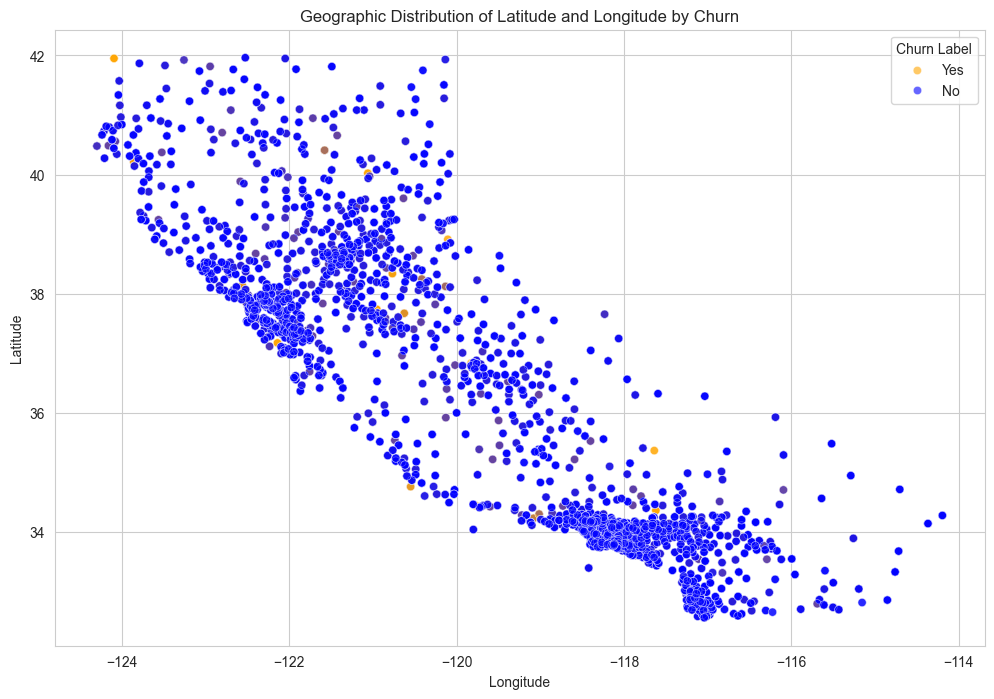

In [62]:
# Configure graph
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='Churn Label',  # Cores diferentes para churn = 1 e churn = 0
    data=telco_final_df,
    palette={0: 'blue', 1: 'orange'},
    alpha=0.6
)
plt.title("Geographic Distribution of Latitude and Longitude by Churn")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Churn Label", labels=["Yes", "No"])

plt.show()

### 17. Population

In [63]:
telecom_func(telco_df,'Population')  

Qty of unique values: 1569

Which are the unique values: [68701 55668 47534 ...   116 73006  8062]
\Qty of null values: 0
\Qty per option (sorted):
Population
11        5
19        4
21        9
23        3
25        4
         ..
97318     5
98239     5
101215    5
103214    5
105285    5
Name: count, Length: 1569, dtype: int64
Number of categories in "Population" is greater than 20, countplot graphic wont be displayed.


In [64]:
telco_final_df['Population'] = telco_df['Population']

In [65]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,Latitude,Longitude,Population
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,34.023810,-118.156582,68701
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,34.044271,-118.185237,55668
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065,34.108833,-118.229715,47534
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303,33.936291,-118.332639,27778
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,33.972119,-118.020188,26265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural,92285,34.341737,-116.539416,2182
7039,0,0,31-41,0,1,1,2,Adelanto,urban,92301,34.667815,-117.536183,18980
7040,0,1,21-31,0,1,1,2,Amboy,rural,92304,34.559882,-115.637164,42
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural,92305,34.167800,-116.864330,301


### 18. Quarter

Qty of unique values: 1

Which are the unique values: ['Q3']
\Qty of null values: 0
\Qty per option:
Quarter
Q3    7043
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


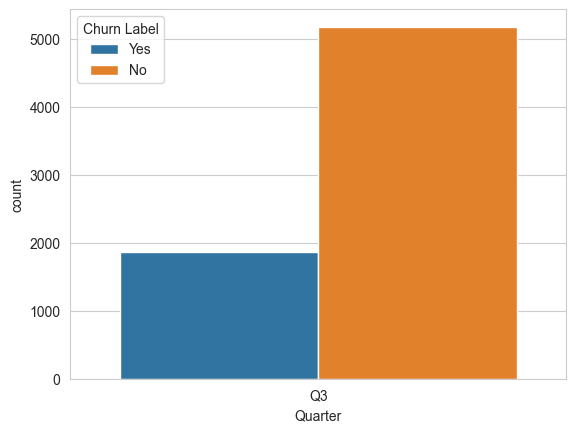

In [66]:
telecom_func(telco_df,'Quarter')  

Irrelevant feature, there is only one quarter

### 19. Referred a Friend

Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Referred a Friend
No     3821
Yes    3222
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


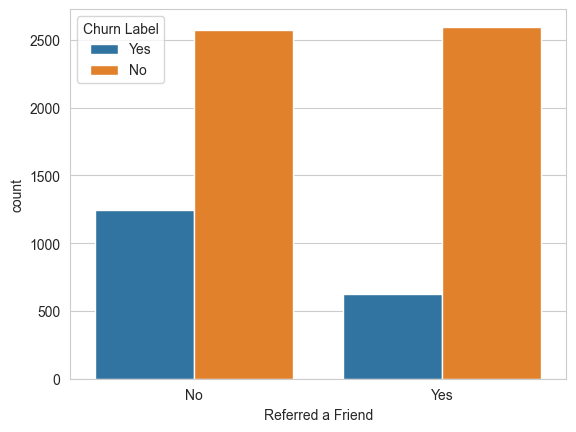

In [67]:
telecom_func(telco_df,'Referred a Friend')  

In [68]:
telco_final_df['Referred a Friend'] = telco_df['Referred a Friend'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3110313921.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Referred a Friend'] = telco_df['Referred a Friend'].replace(['No','Yes'],[0,1])


In [69]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,Latitude,Longitude,Population,Referred a Friend
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,34.023810,-118.156582,68701,0
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,34.044271,-118.185237,55668,1
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065,34.108833,-118.229715,47534,0
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303,33.936291,-118.332639,27778,1
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,33.972119,-118.020188,26265,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural,92285,34.341737,-116.539416,2182,0
7039,0,0,31-41,0,1,1,2,Adelanto,urban,92301,34.667815,-117.536183,18980,1
7040,0,1,21-31,0,1,1,2,Amboy,rural,92304,34.559882,-115.637164,42,1
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural,92305,34.167800,-116.864330,301,1


### 20. Number of Referrals

Qty of unique values: 12

Which are the unique values: [ 0  1  6  2  4  3  7  5  8  9 10 11]
\Qty of null values: 0
\Qty per option (sorted):
Number of Referrals
0     3821
1     1086
2      236
3      255
4      236
5      264
6      221
7      248
8      213
9      238
10     223
11       2
Name: count, dtype: int64


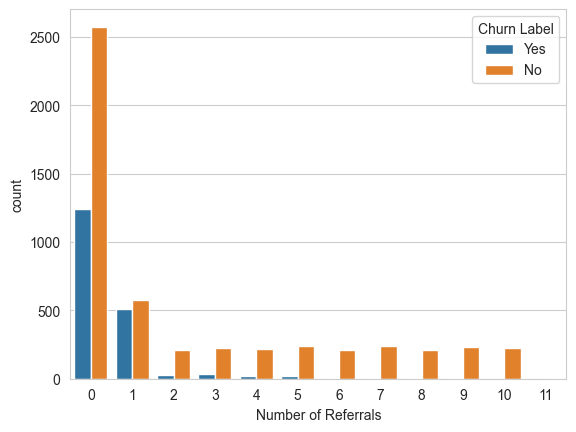

In [70]:
telecom_func(telco_df,'Number of Referrals')  

In [71]:
telco_final_df['Number of Referrals'] = telco_df['Number of Referrals']

In [72]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,Latitude,Longitude,Population,Referred a Friend,Number of Referrals
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,34.023810,-118.156582,68701,0,0
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,34.044271,-118.185237,55668,1,1
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065,34.108833,-118.229715,47534,0,0
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303,33.936291,-118.332639,27778,1,1
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,33.972119,-118.020188,26265,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural,92285,34.341737,-116.539416,2182,0,0
7039,0,0,31-41,0,1,1,2,Adelanto,urban,92301,34.667815,-117.536183,18980,1,1
7040,0,1,21-31,0,1,1,2,Amboy,rural,92304,34.559882,-115.637164,42,1,4
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural,92305,34.167800,-116.864330,301,1,1


### 21. Tenure in Months

In [73]:
# é o número de meses que o cliente está ativo no serviço da operadora. Quanto maior permanecia = maior fidelidade do cliente
telecom_func(telco_df,'Tenure in Months')  

Qty of unique values: 72

Which are the unique values: [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]
\Qty of null values: 0
\Qty per option (sorted):
Tenure in Months
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 72, dtype: int64
Number of categories in "Tenure in Months" is greater than 20, countplot graphic wont be displayed.


In [74]:
telco_final_df['Tenure in Months'] = telco_df['Tenure in Months']

### 22. Offer

After analyzing, I decided not to use it to create the model because there are 55% of NaN values (It would be needed to imputate more than half of the data)

Qty of unique values: 5

Which are the unique values: [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
\Qty of null values: 3877
\Qty per option:
Offer
NaN        3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


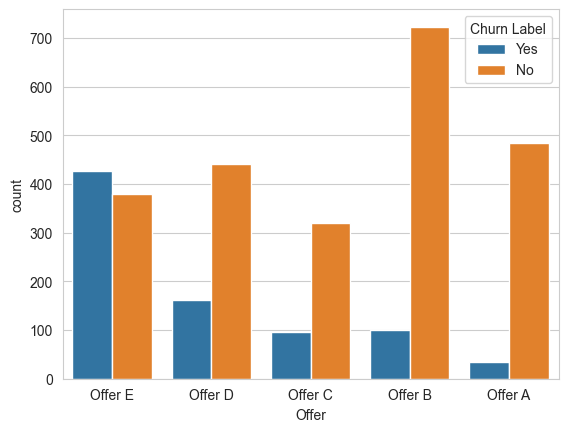

In [75]:
telecom_func(telco_df,'Offer')  

In [76]:
#telco_final_df['Offer'] = telco_df['Offer']

Is the data in Offer a result of an error while collecting the data? Or could it be intentionally inputed and null? for me it looks like it was intentionall
The Nan could be considered and one category "unknown"

In [77]:
#telco_final_df['Offer'] = telco_final_df['Offer'].fillna('Desconhecido')

In [78]:
#telco_final_df[(telco_final_df['Offer'] == 'Desconhecido')]
#display(telco_df[(telco_df['Offer'].isnull())].head(6).T)

In [79]:
# total de offer desconhecido e 3877
# Filtrar as linhas onde 'offer' é 'Desconhecido' e 'Internet Service' é 'No'
#count_matches = telco_final_df[(telco_final_df['Offer'] == 'Desconhecido') & (telco_final_df['Under 30'] == 0)].shape[0]
#print(f"Há {count_matches} registros onde 'offer' é 'Desconhecido' e 'Internet Service' é 'No'.")

In [80]:
#print(telco_final_df.groupby('Offer')['Churn Label'].value_counts())        

In [81]:
#telecom_func(telco_final_df,'Offer') 

### 23. Phone Service

Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Phone Service
Yes    6361
No      682
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


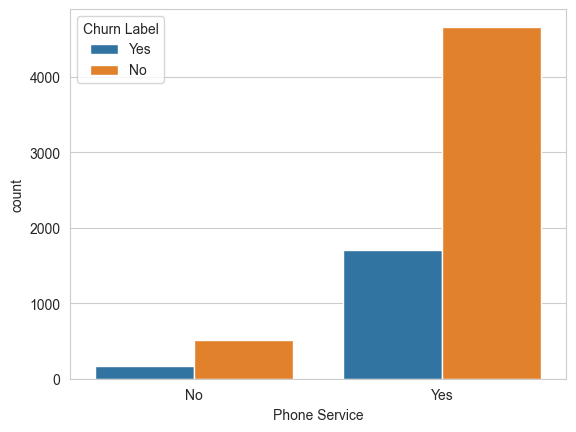

In [82]:
telecom_func(telco_df,'Phone Service')  

In [83]:
telco_final_df['Phone Service'] = telco_df['Phone Service'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3363949164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Phone Service'] = telco_df['Phone Service'].replace(['No','Yes'],[0,1])


### 24. Avg Monthly Long Distance Charges

In [84]:
telecom_func(telco_df,'Avg Monthly Long Distance Charges')  

Qty of unique values: 3584

Which are the unique values: [ 0.   48.85 11.33 ... 44.99 44.98  8.62]
\Qty of null values: 0
\Qty per option (sorted):
Avg Monthly Long Distance Charges
0.00     682
1.01       1
1.02       3
1.03       1
1.05       1
        ... 
49.94      1
49.95      2
49.96      2
49.98      3
49.99      1
Name: count, Length: 3584, dtype: int64
Number of categories in "Avg Monthly Long Distance Charges" is greater than 20, countplot graphic wont be displayed.


In [85]:
telco_final_df['Avg Monthly Long Distance Charges'] = telco_df['Avg Monthly Long Distance Charges']

### 25. Multiple Lines

Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Multiple Lines
No     4072
Yes    2971
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


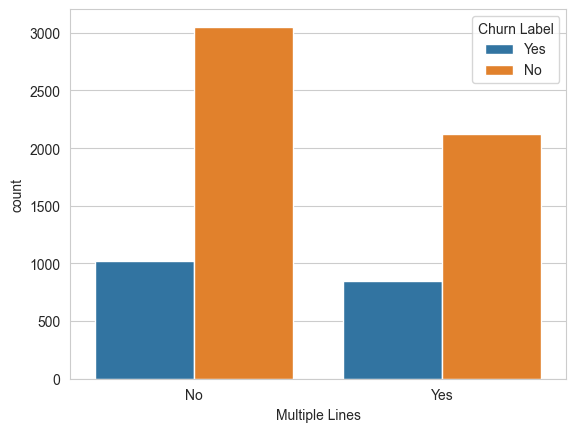

In [86]:
telecom_func(telco_df,'Multiple Lines')  

In [87]:
telco_final_df['Multiple Lines'] = telco_df['Multiple Lines'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\1164716738.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Multiple Lines'] = telco_df['Multiple Lines'].replace(['No','Yes'],[0,1])


### 26. Internet Service

Qty of unique values: 2

Which are the unique values: ['Yes' 'No']
\Qty of null values: 0
\Qty per option:
Internet Service
Yes    5517
No     1526
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


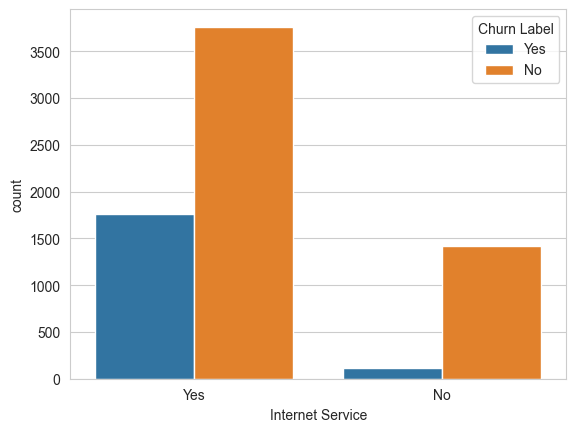

In [88]:
telecom_func(telco_df,'Internet Service')  

In [89]:
telco_final_df['Internet Service'] = telco_df['Internet Service'].replace(['No','Yes'],[0,1])

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\2250358280.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Internet Service'] = telco_df['Internet Service'].replace(['No','Yes'],[0,1])


In [90]:
#count_matches = telco_final_df[(telco_final_df['Offer'] == 'Desconhecido') & (telco_final_df['Internet Service'] == 1) ].shape[0] 
#print(f"Há {count_matches} registros onde 'offer' é 'Desconhecido' e 'Internet Service' é 'No'.")

Relationship between internet service, phone service and multiple lines

Who are the people that dont use internet? Are they the same that dont use phone service?

In [91]:
count_no_internet=(telco_final_df['Internet Service']==0).sum()
count_no_phoneservice=(telco_final_df['Phone Service']==0).sum()


In [92]:
print(f"Number of people that dont use internet service: {count_no_internet}")

Number of people that dont use internet service: 1526


In [93]:
print(f"Number of people that dont use phone service: {count_no_phoneservice}")

Number of people that dont use phone service: 682


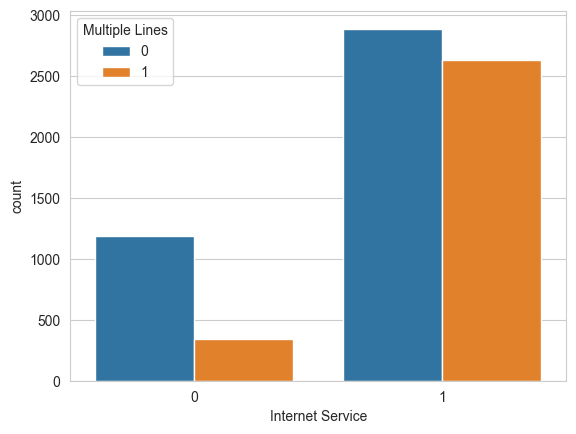

In [94]:
#com esse grafico vi que, os que nao usam net nao sao na sua maioria os que usam multiplos cartoes.
sns.countplot(data=telco_final_df, x='Internet Service', hue='Multiple Lines')
plt.show()

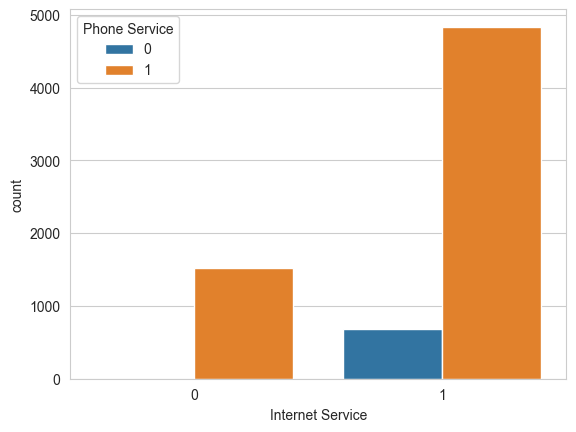

In [95]:
sns.countplot(data=telco_final_df, x='Internet Service', hue='Phone Service')
plt.show()

In that case, the customers that dont use phone service are not the same that dont use internet service.
The customers that have multiple lines are also not the same ones that only use 1 of the mains services (phone, internet)

There are 1,526 customers with Phone Service but not Internet Service. On the other hand, 682 people have Internet Service but no Phone Service. Therefore, among those who use only one service (either Phone Service or Internet Service), the majority prefer Phone Service.

In [96]:
telco_final_df[['Phone Service','Internet Service']].corr()

,Phone Service,Internet Service
Phone Service,1.000000,-0.172209
Internet Service,-0.172209,1.000000


Another hypothesis is: the people that dont use internet service are senior?

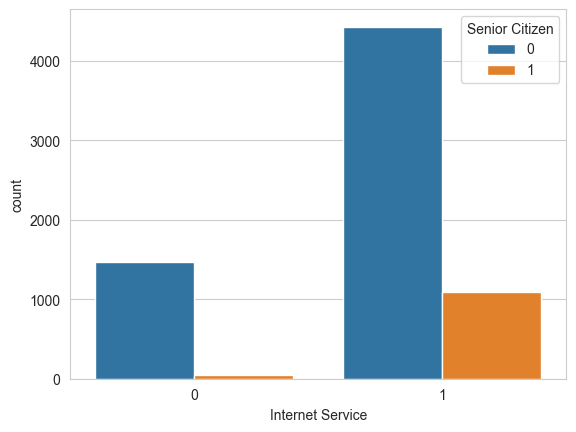

In [97]:
sns.countplot(data=telco_final_df, x='Internet Service', hue='Senior Citizen')
plt.show()

The majority of the group of people that does not use internet service is not senior citizen.

In [98]:
from matplotlib.ticker import FuncFormatter

In [99]:
count_matches = telco_final_df[(telco_final_df['Phone Service'] == 1) & (telco_final_df['Churn Label'] == 1) ].shape[0] 
print(f"Há {count_matches} clientes que usam Phone Service e fizeram churn")

Há 1699 clientes que usam Phone Service e fizeram churn


In [100]:
count_matches = telco_final_df[(telco_final_df['Phone Service'] == 0) & (telco_final_df['Internet Service'] == 1) ].shape[0] 
print(f"Há {count_matches} clientes que nao tem Phone Service e tem Internet Service")

Há 682 clientes que nao tem Phone Service e tem Internet Service


### 27. Internet Type

Qty of unique values: 3

Which are the unique values: ['DSL' 'Fiber Optic' 'Cable' nan]
\Qty of null values: 1526
\Qty per option:
Internet Type
Fiber Optic    3035
DSL            1652
NaN            1526
Cable           830
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


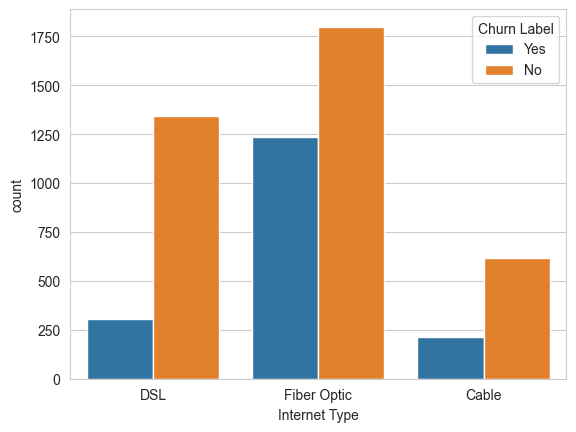

In [101]:
telecom_func(telco_df,'Internet Type') 

In [102]:
telco_final_df['Internet Type'] = telco_df['Internet Type'] 

In [103]:
print(telco_final_df['Internet Type'].dtype)

object


In [104]:
telco_final_df['Internet Type'] = telco_final_df['Internet Type'].fillna('Desconhecido')

Qty of unique values: 4

Which are the unique values: ['DSL' 'Fiber Optic' 'Cable' 'Desconhecido']
\Qty of null values: 0
\Qty per option:
Internet Type
Fiber Optic     3035
DSL             1652
Desconhecido    1526
Cable            830
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


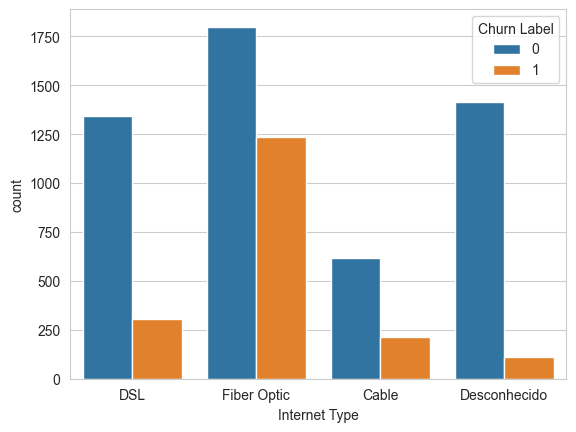

In [105]:
telecom_func(telco_final_df,'Internet Type')

There are two attributes related to the internet: Internet Type and Internet Service (Yes or No). Could it be that where there is NaN in Internet Type, it corresponds to "No" in Internet Service?

In [106]:
# Filtrar as linhas onde 'Internet Type' é 'Desconhecido' e 'Internet Service' é 'No'
count_matches = telco_final_df[(telco_final_df['Internet Type'] == 'Desconhecido') & (telco_final_df['Internet Service'] == 0)].shape[0]

print(f"Há {count_matches} registros onde 'Internet Type' é 'Desconhecido' e 'Internet Service' é 'No'.")

Há 1526 registros onde 'Internet Type' é 'Desconhecido' e 'Internet Service' é 'No'.


All instances of NaN in the Internet Type attribute correspond to customers who do not have Internet Service ("No").

In [107]:
telco_final_df['Internet Type'] = telco_final_df['Internet Type'].replace('Desconhecido', 'Sem Serviço internet')

### 28. Avg Monthly GB Download

In [108]:
telecom_func(telco_df,'Avg Monthly GB Download')  

Qty of unique values: 50

Which are the unique values: [ 8 17 52 12 14 18 30 24 19 29 28 11  9  7 15  2 10  5 13  0 27 26 22 25
 21 20  6 16 23  4  3 58 53 75 51 47 69 41 57 56 71 48 73 76 59 82 42 39
 85 46]
\Qty of null values: 0
\Qty per option (sorted):
Avg Monthly GB Download
0     1526
2      116
3      130
4      129
5      114
6      114
7      116
8      120
9      116
10     132
11     145
12     143
13     164
14     131
15     132
16     155
17     155
18     164
19     220
20     151
21     171
22     172
23     179
24     148
25     130
26     191
27     199
28     147
29     138
30     193
39       1
41      67
42      45
46      19
47      36
48      86
51      90
52     121
53      88
56      16
57      34
58      45
59     192
69      75
71      42
73      81
75      15
76      58
82      43
85      48
Name: count, dtype: int64
Number of categories in "Avg Monthly GB Download" is greater than 20, countplot graphic wont be displayed.


In [109]:
telco_final_df['Avg Monthly GB Download'] = telco_df['Avg Monthly GB Download']

In [110]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,...,Population,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,...,68701,0,0,1,0,0.00,0,1,DSL,8
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,...,55668,1,1,8,1,48.85,1,1,Fiber Optic,17
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065,...,47534,0,0,18,1,11.33,1,1,Fiber Optic,52
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303,...,27778,1,1,25,1,19.76,0,1,Fiber Optic,12
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,...,26265,1,1,37,1,6.33,1,1,Fiber Optic,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural,92285,...,2182,0,0,72,1,22.77,0,0,Sem Serviço internet,0
7039,0,0,31-41,0,1,1,2,Adelanto,urban,92301,...,18980,1,1,24,1,36.05,1,1,Cable,24
7040,0,1,21-31,0,1,1,2,Amboy,rural,92304,...,42,1,4,72,1,29.66,1,1,Fiber Optic,59
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural,92305,...,301,1,1,11,0,0.00,0,1,DSL,17


Relationship between internet type and qty of internet consumed

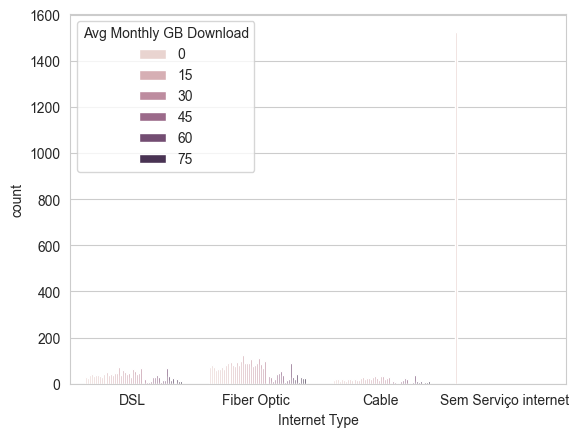

In [111]:
#Avg Monthly GB Download        Internet Type

sns.countplot(data=telco_final_df, x='Internet Type', hue='Avg Monthly GB Download')
plt.show()

Customers do more churn when using fiber optic,  and less churn when using internet by cable

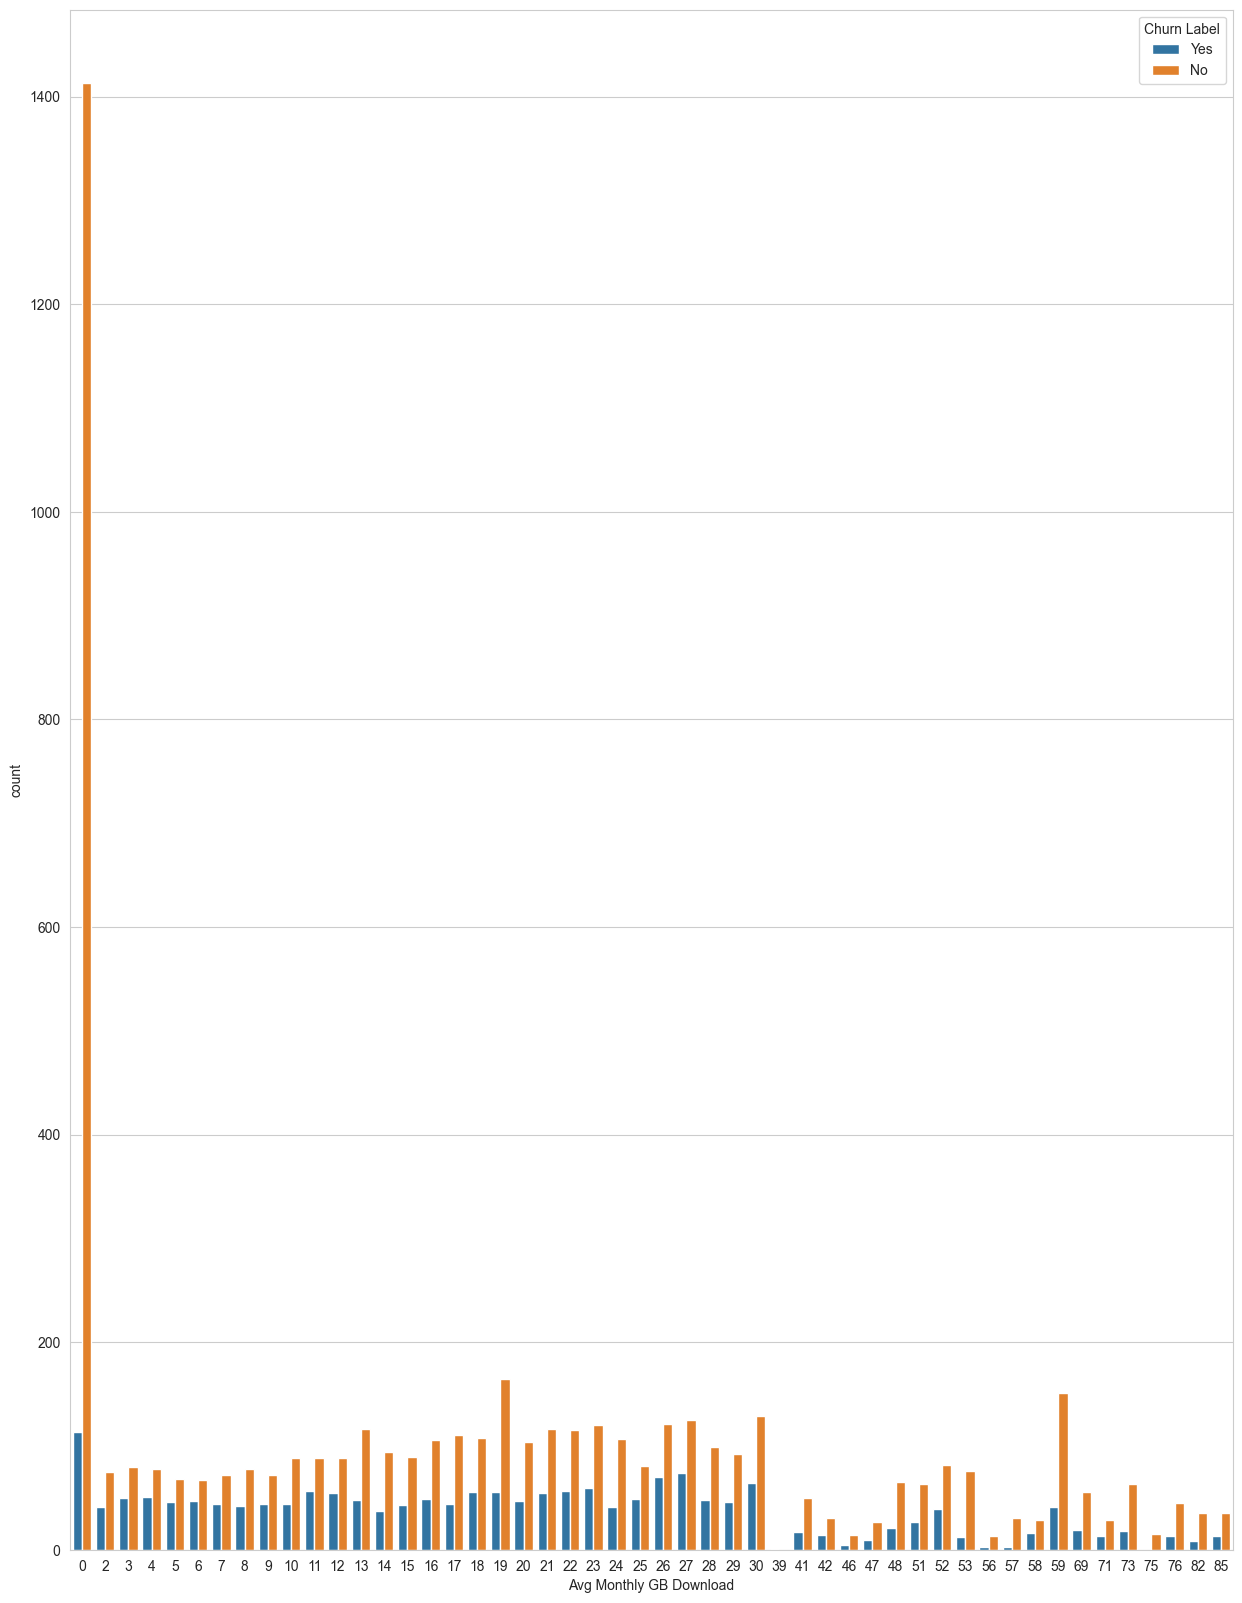

In [112]:
plt.figure(figsize=(15, 20))
sns.countplot(data=telco_df, x='Avg Monthly GB Download', hue='Churn Label')
plt.show()

### 29. Online Security

Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Online Security
No     5024
Yes    2019
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


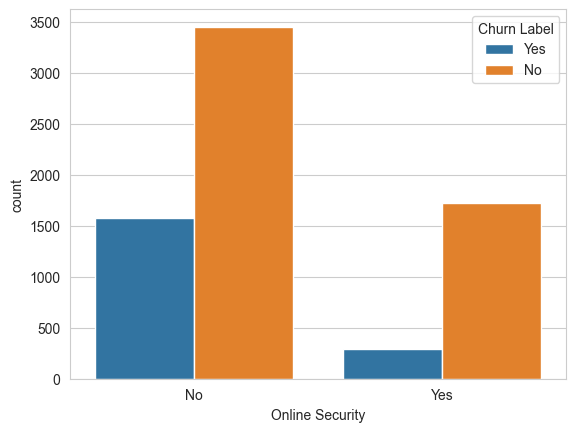

In [113]:
telecom_func(telco_df,'Online Security')  

In [114]:
telco_final_df['Online Security'] = telco_df['Online Security'].replace(['No','Yes'], [0,1])   

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3389097803.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Online Security'] = telco_df['Online Security'].replace(['No','Yes'], [0,1])


### 30. Online Backup

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Online Backup
No     4614
Yes    2429
Name: count, dtype: int64


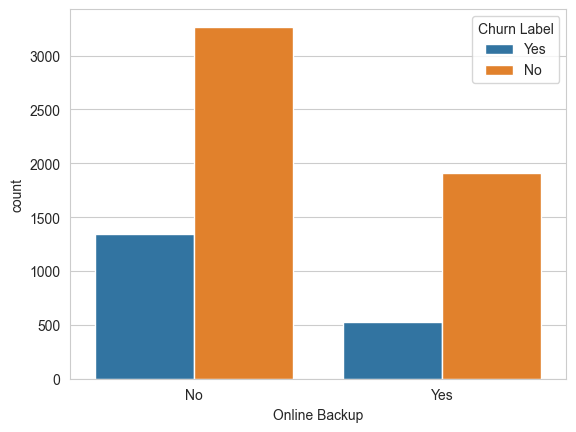

In [115]:
telecom_func(telco_df,'Online Backup') 

In [116]:
telco_final_df['Online Backup'] = telco_df['Online Backup'].replace(['No','Yes'], [0,1]) 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\1132529910.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Online Backup'] = telco_df['Online Backup'].replace(['No','Yes'], [0,1])


### 31. Device Protection Plan

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 2

Which are the unique values: ['Yes' 'No']
\Qty of null values: 0
\Qty per option:
Device Protection Plan
No     4621
Yes    2422
Name: count, dtype: int64


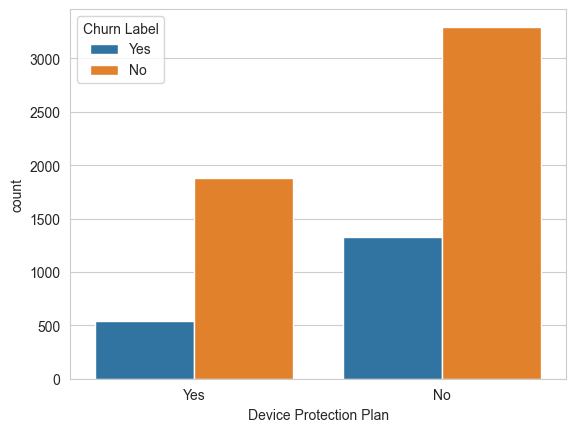

In [117]:
telecom_func(telco_df,'Device Protection Plan') 

In [118]:
telco_final_df['Device Protection Plan'] = telco_df['Device Protection Plan'].replace(['No','Yes'], [0,1]) 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\4244676926.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Device Protection Plan'] = telco_df['Device Protection Plan'].replace(['No','Yes'], [0,1])


### 32. Premium Tech Support

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Premium Tech Support
No     4999
Yes    2044
Name: count, dtype: int64


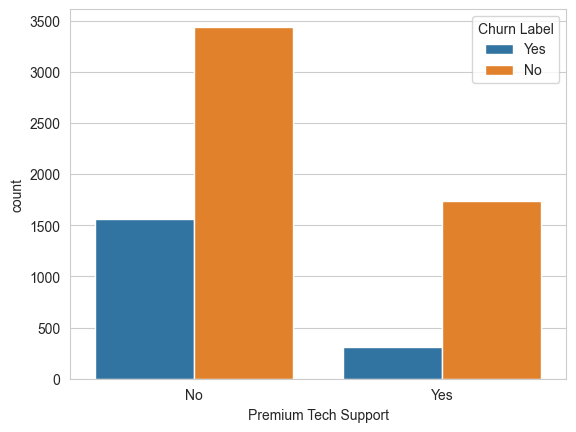

In [119]:
telecom_func(telco_df,'Premium Tech Support') 

In [120]:
telco_final_df['Premium Tech Support'] = telco_df['Premium Tech Support'].replace(['No','Yes'], [0,1]) 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3730356829.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Premium Tech Support'] = telco_df['Premium Tech Support'].replace(['No','Yes'], [0,1])


### 33. Streaming TV

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Streaming TV
No     4336
Yes    2707
Name: count, dtype: int64


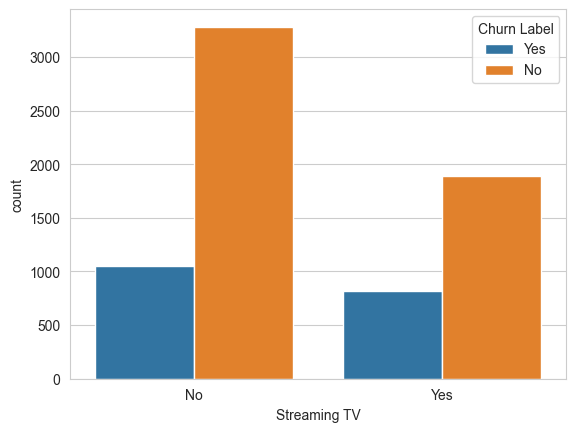

In [121]:
telecom_func(telco_df,'Streaming TV') 

In [122]:
telco_final_df['Streaming TV'] = telco_df['Streaming TV'].replace(['No','Yes'], [0,1]) 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\745775002.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Streaming TV'] = telco_df['Streaming TV'].replace(['No','Yes'], [0,1])


### 34. Streaming Movies

Qty of unique values: 2

Which are the unique values: ['Yes' 'No']
\Qty of null values: 0
\Qty per option:
Streaming Movies
No     4311
Yes    2732
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


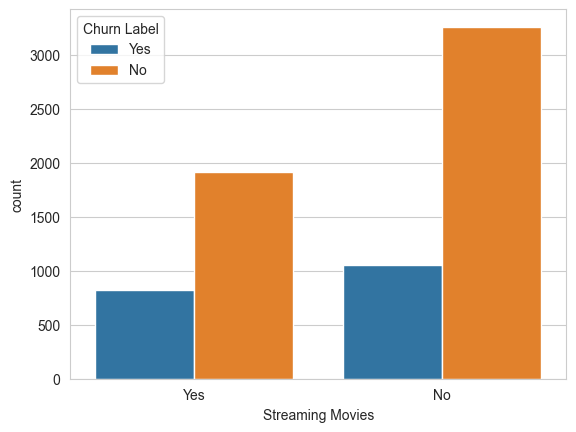

In [123]:
telecom_func(telco_df,'Streaming Movies') 

In [124]:
telco_final_df['Streaming Movies'] = telco_df['Streaming Movies'].replace(['No','Yes'], [0,1]) 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\1340877928.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Streaming Movies'] = telco_df['Streaming Movies'].replace(['No','Yes'], [0,1])


### 35. Streaming Music

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Streaming Music
No     4555
Yes    2488
Name: count, dtype: int64


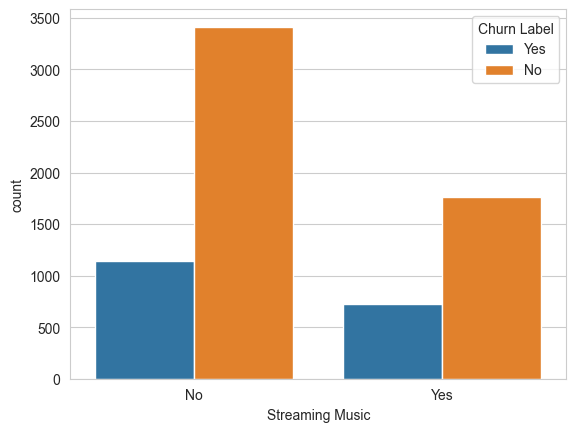

In [125]:
telecom_func(telco_df,'Streaming Music') 

In [126]:
telco_final_df['Streaming Music'] = telco_df['Streaming Music'].replace(['No','Yes'], [0,1]) 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\1002694929.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Streaming Music'] = telco_df['Streaming Music'].replace(['No','Yes'], [0,1])


### 36. Unlimited Data

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 2

Which are the unique values: ['No' 'Yes']
\Qty of null values: 0
\Qty per option:
Unlimited Data
Yes    4745
No     2298
Name: count, dtype: int64


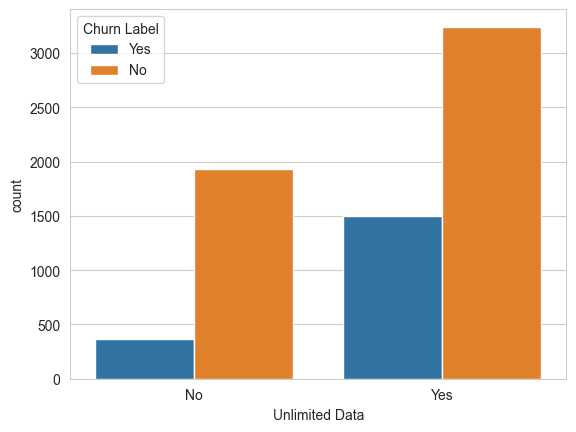

In [127]:
telecom_func(telco_df,'Unlimited Data')

In [128]:
telco_final_df['Unlimited Data'] = telco_df['Unlimited Data'].replace(['No','Yes'], [0,1]) 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3932227390.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Unlimited Data'] = telco_df['Unlimited Data'].replace(['No','Yes'], [0,1])


### 37. Contract

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 3

Which are the unique values: ['Month-to-Month' 'One Year' 'Two Year']
\Qty of null values: 0
\Qty per option:
Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64


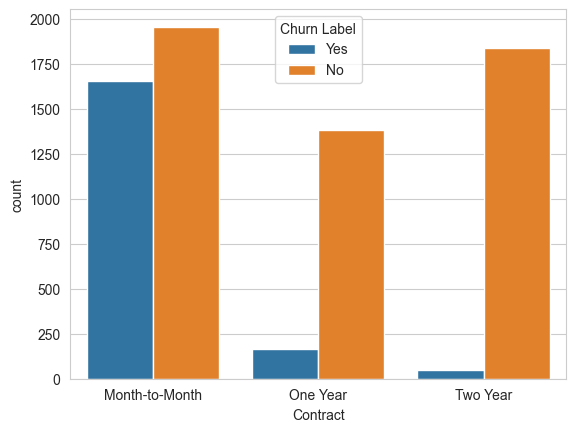

In [129]:
telecom_func(telco_df,'Contract')

In [130]:
telco_final_df['Contract'] = telco_df['Contract']

### 38. Paperless Billing

Qty of unique values: 2

Which are the unique values: ['Yes' 'No']
\Qty of null values: 0
\Qty per option:
Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


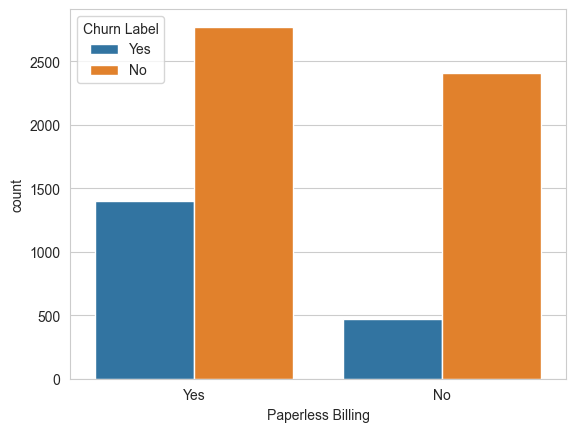

In [131]:
telecom_func(telco_df,'Paperless Billing')

In [132]:
telco_final_df['Paperless Billing'] = telco_df['Paperless Billing'].replace(['No','Yes'], [0,1]) 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\42282600.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telco_final_df['Paperless Billing'] = telco_df['Paperless Billing'].replace(['No','Yes'], [0,1])


### 39. Payment Method

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


Qty of unique values: 3

Which are the unique values: ['Bank Withdrawal' 'Credit Card' 'Mailed Check']
\Qty of null values: 0
\Qty per option:
Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64


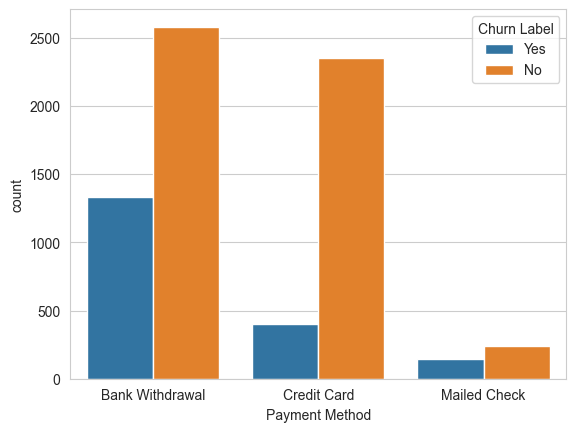

In [133]:
telecom_func(telco_df,'Payment Method')

In [134]:
telco_final_df['Payment Method'] = telco_df['Payment Method']

### 40. Monthly Charge

In [135]:
telecom_func(telco_df,'Monthly Charge')

Qty of unique values: 1585

Which are the unique values: [39.65 80.65 95.45 ... 43.05 72.   78.7 ]
\Qty of null values: 0
\Qty per option (sorted):
Monthly Charge
18.25     1
18.40     1
18.55     1
18.70     2
18.75     1
         ..
118.20    1
118.35    1
118.60    2
118.65    1
118.75    1
Name: count, Length: 1585, dtype: int64
Number of categories in "Monthly Charge" is greater than 20, countplot graphic wont be displayed.


In [136]:
telco_final_df['Monthly Charge'] = telco_df['Monthly Charge'].round()

In [137]:
telecom_func(telco_final_df,'Monthly Charge')

Qty of unique values: 101

Which are the unique values: [ 40.  81.  95.  98.  76.  78.  70.  45.  74.  41. 107.  94.  75.  93.
  82.  42.  31.  20.  85.  28.  89.  86. 105.  90. 111.  49.  92.  99.
 110.  96.  79. 100.  73.  30. 104. 101.  88.  44. 106.  80.  60.  87.
  69.  25.  84.  97.  26.  50. 113.  43.  57. 109. 108.  71.  91.  83.
  24.  63.  35. 103.  54.  19.  59.  36.  56.  55. 102.  48.  72. 112.
  66.  51.  39. 117.  29.  46.  77.  62.  21.  65.  52. 116.  64. 115.
  61.  34.  67.  37. 114.  58.  33.  53.  68.  47. 118.  23.  18. 119.
  27.  38.  32.]
\Qty of null values: 0
\Qty per option (sorted):
Monthly Charge
18.0       2
19.0     206
20.0     815
21.0     161
23.0       7
        ... 
115.0     25
116.0     32
117.0     11
118.0      5
119.0      4
Name: count, Length: 101, dtype: int64
Number of categories in "Monthly Charge" is greater than 20, countplot graphic wont be displayed.


### 41. Total Charges

In [138]:
telecom_func(telco_df,'Total Charges')

Qty of unique values: 6540

Which are the unique values: [  39.65  633.3  1752.55 ... 7362.9   346.45 6844.5 ]
\Qty of null values: 0
\Qty per option (sorted):
Total Charges
18.80      1
18.85      2
18.90      1
19.00      1
19.05      1
          ..
8564.75    1
8594.40    1
8670.10    1
8672.45    1
8684.80    1
Name: count, Length: 6540, dtype: int64
Number of categories in "Total Charges" is greater than 20, countplot graphic wont be displayed.


In [139]:
telco_final_df['Total Charges'] = telco_df['Total Charges'].round() #arredondando fica com 3828 valores unicos. Ja que corr e -0.19 entao nao e necessario preservar casas decimais (forma ocntinua)

In [140]:
#correlacao entre total charges e churn label
cols_of_interest = ['Total Charges', 'Churn Label']
telco_final_df[cols_of_interest].corr()

,Total Charges,Churn Label
Total Charges,1.000000,-0.198545
Churn Label,-0.198545,1.000000


### 42. Total Refunds

In [141]:
telecom_func(telco_df,'Total Refunds') 

Qty of unique values: 500

Which are the unique values: [ 0.   45.61 13.43 40.95 11.05 29.84 49.57 12.07 40.64 10.2  17.88 37.55
 48.09 32.46 20.23 12.59 43.31  8.13 46.64 23.33 47.2  33.25 33.73 49.06
 25.79 15.24 26.99 44.58 20.16  8.88 12.48  6.79 39.29 44.31  5.49 25.67
  9.49 29.17 19.25 45.69 29.88 39.93 26.98 11.83 16.58 17.16 18.85 37.64
 41.2  12.19 45.81 49.53 21.52 29.   29.99 21.08 36.4  21.17  6.26 17.91
 34.67 28.93 41.23 47.73 40.46 15.41 38.98 16.73 27.15 45.82 39.18 31.05
 20.45  6.65 47.04 15.2   1.69 43.66 24.36 27.89  6.11  7.43 25.07 48.66
 36.52 38.09 24.98 21.71 36.78 30.75 25.55 17.19 33.1  32.71  4.76 44.81
  3.33 19.16 31.58  1.09 18.64 44.17 17.76 33.07  8.74  4.48 36.6  33.43
 45.44 18.55 33.21 48.25 21.72 21.69 14.22 45.37 27.6  10.17 36.44 13.03
 23.89 11.   34.29 48.26 35.82 15.73  9.36 19.67 39.27 41.85 40.   12.81
  4.73 27.38 14.24 13.01 11.45 28.35  7.39 35.05 41.18 30.46 48.61 26.02
 38.48 14.23 40.15 48.95 24.44  9.68 23.72 20.29 48.54  4.96 18.21  

In [142]:
telco_final_df['Total Refunds'] = telco_df['Total Refunds'] 

### 43. Total Extra Data Charges

Qty of unique values: 16

Which are the unique values: [ 20   0  10 120 140  90  80  30 100  40 110 150  70  50 130  60]
\Qty of null values: 0
\Qty per option (sorted):
Total Extra Data Charges
0      6315
10      138
20       51
30       58
40       62
50       43
60       36
70       34
80       47
90       35
100      44
110      32
120      28
130      40
140      38
150      42
Name: count, dtype: int64


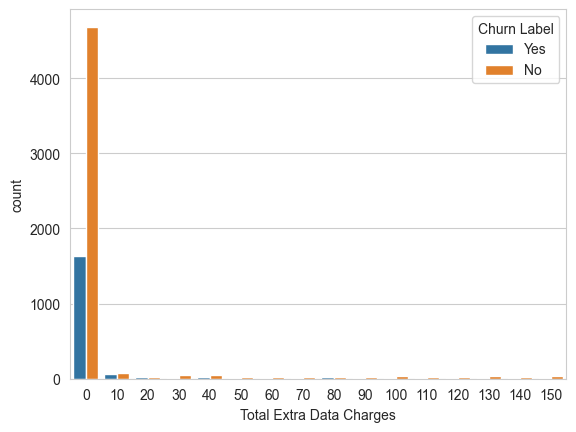

In [143]:
telecom_func(telco_df,'Total Extra Data Charges')

In [144]:
telco_final_df['Total Extra Data Charges'] = telco_df['Total Extra Data Charges'] 

In [145]:
#correlacao entre total charges e churn label
cols_of_interest = ['Total Extra Data Charges', 'Churn Label']
telco_final_df[cols_of_interest].corr()

,Total Extra Data Charges,Churn Label
Total Extra Data Charges,1.000000,0.007139
Churn Label,0.007139,1.000000


### 44. Total Long Distance Charges

In [146]:
telecom_func(telco_df,'Total Long Distance Charges')

Qty of unique values: 6087

Which are the unique values: [   0.    390.8   203.94 ...  865.2  2135.52 2043.36]
\Qty of null values: 0
\Qty per option (sorted):
Total Long Distance Charges
0.00       682
1.13         1
1.15         1
1.17         1
1.23         1
          ... 
3508.82      1
3515.92      1
3536.64      1
3564.00      1
3564.72      1
Name: count, Length: 6087, dtype: int64
Number of categories in "Total Long Distance Charges" is greater than 20, countplot graphic wont be displayed.


In [147]:
telco_final_df['Total Long Distance Charges'] = telco_df['Total Long Distance Charges'] 

### 45. Total Revenue

In [148]:
telecom_func(telco_df,'Total Revenue')

Qty of unique values: 6982

Which are the unique values: [  59.65 1024.1  1910.88 ... 9453.04  319.21 8887.86]
\Qty of null values: 0
\Qty per option (sorted):
Total Revenue
21.36       1
21.40       1
21.61       1
22.08       1
22.12       1
           ..
11634.53    1
11688.90    1
11795.78    1
11868.34    1
11979.34    1
Name: count, Length: 6982, dtype: int64
Number of categories in "Total Revenue" is greater than 20, countplot graphic wont be displayed.


In [149]:
telco_final_df['Total Revenue'] = telco_df['Total Revenue'] 

How much did the customers that did churn paid for? Churned while using Internet Service

In [150]:
clients_churned_net_df=pd.DataFrame() 
clients_churned_net_df=telco_final_df[(telco_final_df['Internet Service']==1) & (telco_final_df['Churn Label']==1)] 
clients_churned_net_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,...,0,Month-to-Month,1,Bank Withdrawal,40.0,40.0,0.00,20,0.00,59.65
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,...,1,Month-to-Month,1,Credit Card,81.0,633.0,0.00,0,390.80,1024.10
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065,...,1,Month-to-Month,1,Bank Withdrawal,95.0,1753.0,45.61,0,203.94,1910.88
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303,...,1,Month-to-Month,1,Bank Withdrawal,98.0,2514.0,13.43,0,494.00,2995.07
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,...,1,Month-to-Month,1,Bank Withdrawal,76.0,2868.0,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,1,1,21-31,0,0,0,0,Imperial,urban,92251,...,1,Month-to-Month,1,Credit Card,60.0,272.0,0.00,0,72.12,344.27
2531,1,0,61-71,0,1,1,2,Ocotillo,rural,92259,...,1,Month-to-Month,1,Credit Card,71.0,71.0,0.00,0,37.68,108.33
2532,1,0,41-51,0,0,0,0,Palm Springs,urban,92264,...,1,One Year,1,Bank Withdrawal,60.0,728.0,0.00,0,115.20,843.00
2533,1,1,31-41,0,0,0,0,Seeley,rural,92273,...,1,Month-to-Month,1,Bank Withdrawal,44.0,403.0,0.00,0,377.28,780.63


In [151]:
clients_churned_net_df['Total Revenue'].describe()

count     1756.000000
mean      2073.663229
std       2475.170454
min         23.450000
25%        214.605000
50%       1002.150000
75%       3104.677500
max      11195.440000
Name: Total Revenue, dtype: float64

Customers churned while using internet services had an average of 2073$ total revenue

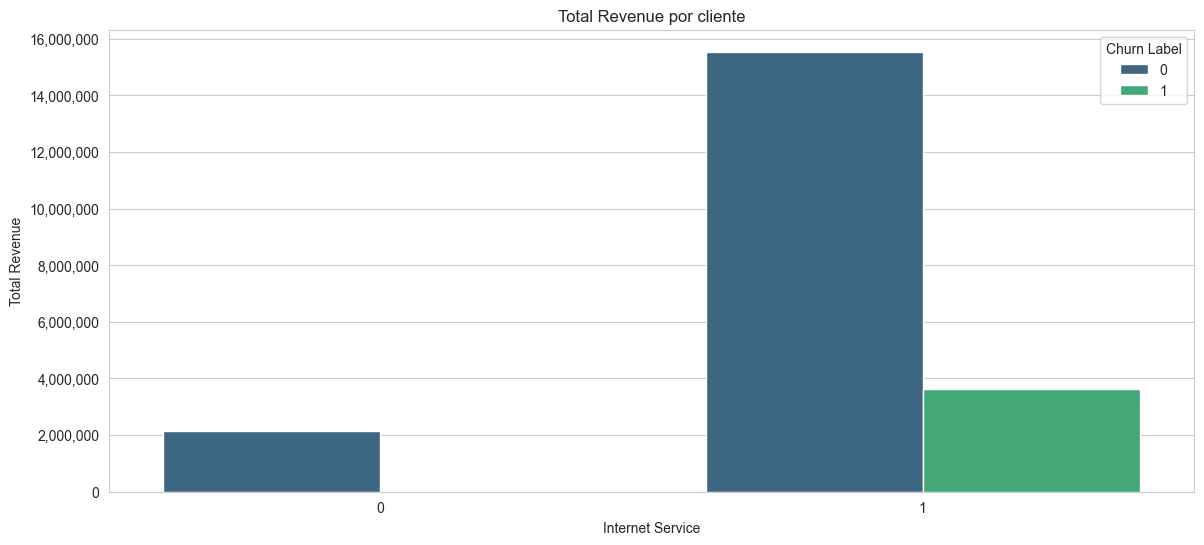

In [152]:
total_revenue_group=telco_final_df.groupby(['Internet Service', 'Churn Label'])['Total Revenue'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='Internet Service', y='Total Revenue', data=total_revenue_group, hue='Churn Label' , palette='viridis')

plt.title('Total Revenue por cliente')
plt.xlabel('Internet Service')
plt.ylabel('Total Revenue')
#sns.countplot(data=telco_final_df, x='Internet Service', hue='Total Revenue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show() 

### 46. Satisfaction Score

Qty of unique values: 5

Which are the unique values: [3 2 1 4 5]
\Qty of null values: 0
\Qty per option (sorted):
Satisfaction Score
1     922
2     518
3    2665
4    1789
5    1149
Name: count, dtype: int64


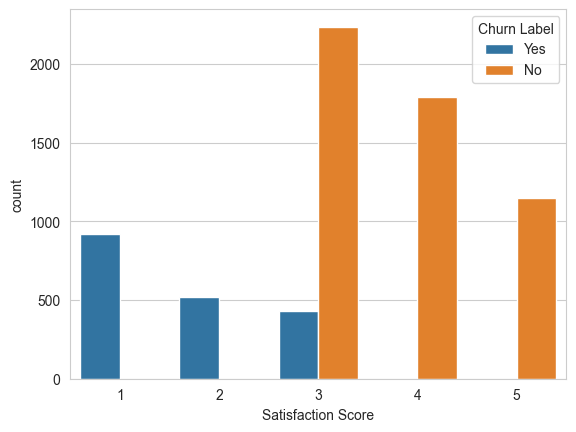

In [153]:
telecom_func(telco_df,'Satisfaction Score')

In [154]:
telco_final_df['Satisfaction Score'] = telco_df['Satisfaction Score'] 

### 47. Customer Status

Qty of unique values: 3

Which are the unique values: ['Churned' 'Stayed' 'Joined']
\Qty of null values: 0
\Qty per option:
Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


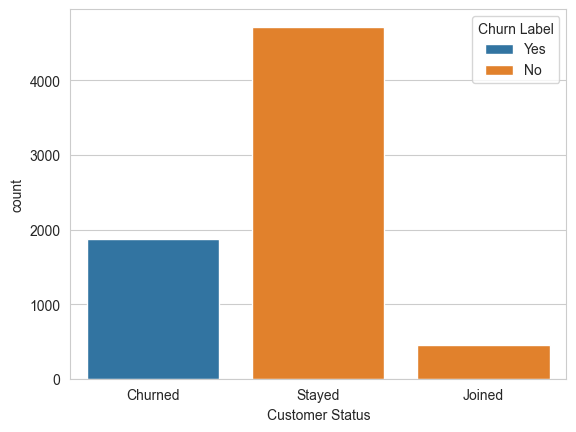

In [155]:
telecom_func(telco_df,'Customer Status') 

This feature won't be used because it indicates whether a customer has churned,joined or stayed, and we won't have this information available in production when predicting for new customers.

In [156]:
#telco_final_df['Customer Status'] = telco_df['Customer Status'] 

### 48. Churn Score

In [157]:
telecom_func(telco_df,'Churn Score') 

Qty of unique values: 81

Which are the unique values: [91 69 81 88 67 95 76 85 86 65 96 84 80 73 83 90 89 87 82 74 66 92 72 70
 94 68 75 93 77 79 71 78 38 40 52 25 59 21 55 60 28  8  7 50 36 23 41 34
 26 56 44 30 62 24 47 22 32 64 27 29 54 39 45 33 58 35 20 31 61 49 37 63
 48 57 42 53 46 43 51  9  5]
\Qty of null values: 0
\Qty per option (sorted):
Churn Score
5      1
7      2
8      2
9      3
20    83
      ..
92    51
93    50
94    46
95    46
96    49
Name: count, Length: 81, dtype: int64
Number of categories in "Churn Score" is greater than 20, countplot graphic wont be displayed.


In [158]:
telco_final_df['Churn Score'] = telco_df['Churn Score'] 

### 49. CLTV

In [159]:
telecom_func(telco_df,'CLTV') 

Qty of unique values: 3438

Which are the unique values: [5433 5302 3179 ... 2770 4645 5553]
\Qty of null values: 0
\Qty per option (sorted):
CLTV
2003    3
2004    3
2006    1
2007    4
2008    1
       ..
6492    3
6494    2
6495    1
6499    2
6500    1
Name: count, Length: 3438, dtype: int64
Number of categories in "CLTV" is greater than 20, countplot graphic wont be displayed.


In [160]:
telco_final_df['CLTV'] = telco_df['CLTV'] 

### 50. Churn Category

This feature won't be used because it indicates the category of churn, and we won't have this information available in production when predicting for new customers.

Qty of unique values: 5

Which are the unique values: ['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]
\Qty of null values: 5174
\Qty per option:
Churn Category
NaN                5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


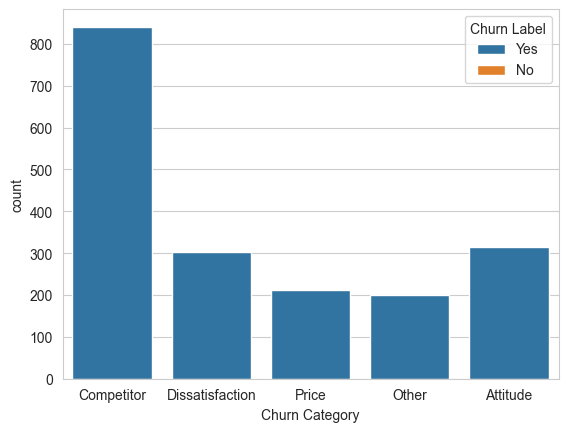

In [161]:
telecom_func(telco_df,'Churn Category') 

In [162]:
#telco_final_df['Churn Category'] = telco_df['Churn Category'] 

In [163]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,...,Bank Withdrawal,40.0,40.0,0.00,20,0.00,59.65,3,91,5433
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,...,Credit Card,81.0,633.0,0.00,0,390.80,1024.10,3,69,5302
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065,...,Bank Withdrawal,95.0,1753.0,45.61,0,203.94,1910.88,2,81,3179
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303,...,Bank Withdrawal,98.0,2514.0,13.43,0,494.00,2995.07,2,88,5337
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,...,Bank Withdrawal,76.0,2868.0,0.00,0,234.21,3102.36,2,67,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural,92285,...,Bank Withdrawal,21.0,1419.0,19.31,0,1639.44,3039.53,5,45,5306
7039,0,0,31-41,0,1,1,2,Adelanto,urban,92301,...,Mailed Check,85.0,1990.0,48.23,0,865.20,2807.47,3,59,2140
7040,0,1,21-31,0,1,1,2,Amboy,rural,92304,...,Credit Card,103.0,7363.0,45.38,0,2135.52,9453.04,4,71,5560
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural,92305,...,Bank Withdrawal,30.0,346.0,27.24,0,0.00,319.21,4,59,2793


In [164]:
#groupby
# print(telco_final_df.groupby('Churn Category')['Internet Service'].value_counts())

In [165]:
#Todos registos que tem churn category=desconhecido, sao os que nao fizeram churn
#telco_final_df['Churn Category'] = telco_final_df['Churn Category'].fillna('Desconhecido')

In [166]:
#print(telco_final_df.groupby('Churn Category')['Referred a Friend'].value_counts())

In [167]:
#telco_encoded_df = pd.concat([telco_final_df, churn_encoded], axis=1)

In [168]:
#telco_encoded_df

In [169]:
'''f, ax1 = plt.subplots(1, 1, figsize=(14,10))                                      

#corr = telco_final_df.corr()

corr = telco_encoded_df.select_dtypes(include=[float, int]).corr()

sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("correlation matrix ", fontsize=14)

plt.show() '''

'f, ax1 = plt.subplots(1, 1, figsize=(14,10))                                      \n\n#corr = telco_final_df.corr()\n\ncorr = telco_encoded_df.select_dtypes(include=[float, int]).corr()\n\nsns.heatmap(corr, cmap=\'coolwarm_r\', annot_kws={\'size\':20}, ax=ax1)\nax1.set_title("correlation matrix ", fontsize=14)\n\nplt.show() '

### 51. Churn Reason 

This feature won't be used because we won't have this information available in production when predicting for new customers.

Qty of unique values: 20

Which are the unique values: ['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' nan 'Lack of self-service on Website']
\Qty of null values: 5174
\Qty per option:
Churn Reason
NaN                                          5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download 

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3386012006.py:13: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(data[column]) and data[column].cat.ordered:


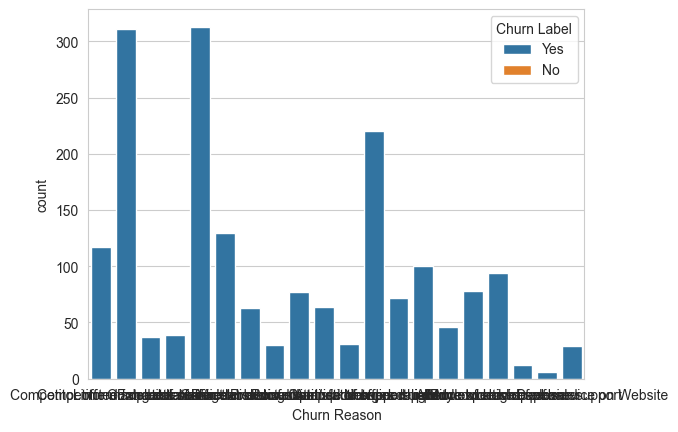

In [170]:
telecom_func(telco_df,'Churn Reason') 

In [171]:
#telco_df['Churn Reason'] = telco_df['Churn Reason'].fillna('Desconhecido')

esse "Desconhecido" representa os que nao fizeram churn

In [172]:
#telecom_func(telco_df,'Churn Reason') 

In [173]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,...,Bank Withdrawal,40.0,40.0,0.00,20,0.00,59.65,3,91,5433
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,...,Credit Card,81.0,633.0,0.00,0,390.80,1024.10,3,69,5302
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065,...,Bank Withdrawal,95.0,1753.0,45.61,0,203.94,1910.88,2,81,3179
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303,...,Bank Withdrawal,98.0,2514.0,13.43,0,494.00,2995.07,2,88,5337
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,...,Bank Withdrawal,76.0,2868.0,0.00,0,234.21,3102.36,2,67,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural,92285,...,Bank Withdrawal,21.0,1419.0,19.31,0,1639.44,3039.53,5,45,5306
7039,0,0,31-41,0,1,1,2,Adelanto,urban,92301,...,Mailed Check,85.0,1990.0,48.23,0,865.20,2807.47,3,59,2140
7040,0,1,21-31,0,1,1,2,Amboy,rural,92304,...,Credit Card,103.0,7363.0,45.38,0,2135.52,9453.04,4,71,5560
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural,92305,...,Bank Withdrawal,30.0,346.0,27.24,0,0.00,319.21,4,59,2793


In [174]:
telco_df

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN


# ____________________________________________________________________________________________________________________

### Business Answers

1. Which services tend to have high churn?

There are 10 services available: 
phone service, 
internet service, 
online security, 
online backup, 
premium tech support, 
streaming tv, 
streaming music, 
streaming movies, 
device protection plan, 
unlimited data

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3763219534.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChurnCount', y='Service', data=churn_counts_df, palette='viridis')


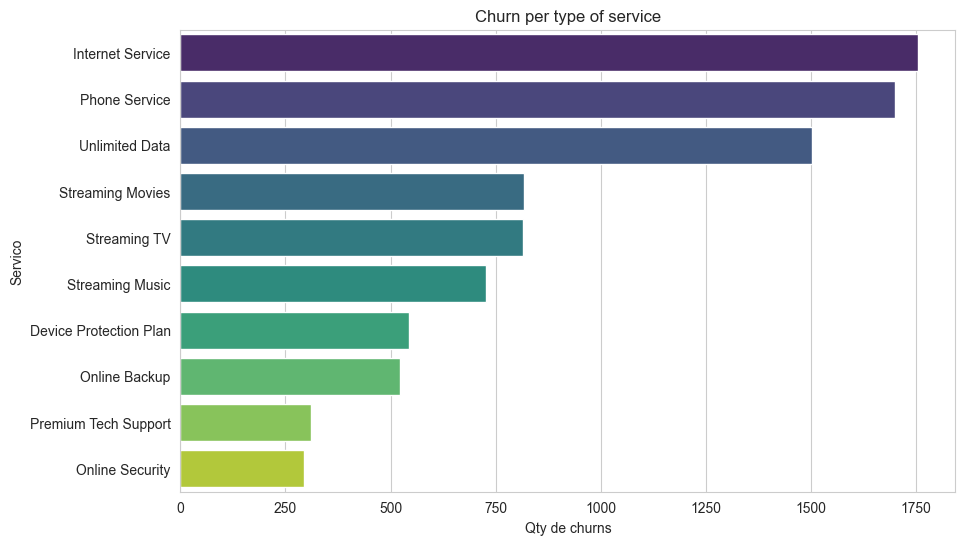

In [176]:
churn_data=telco_final_df[telco_final_df['Churn Label']==1]
services = ['Phone Service','Internet Service','Online Security','Online Backup','Premium Tech Support','Streaming TV','Streaming Music','Streaming Movies','Device Protection Plan','Unlimited Data']
churn_counts={service:churn_data[service].sum() for service in services}

churn_counts_df=pd.DataFrame(list(churn_counts.items()), columns=['Service','ChurnCount'])
churn_counts_df=churn_counts_df.sort_values(by='ChurnCount', ascending=False)  

plt.figure(figsize=(10, 6))
sns.barplot(x='ChurnCount', y='Service', data=churn_counts_df, palette='viridis')
plt.title('Churn per type of service')
plt.xlabel('Qty de churns')
plt.ylabel('Servico')
plt.show()

The service with the highest churn is Internet Service, followed by phone service and unlimited data.

2. What would we do to reduce churn?

Number of customers using more than 1 service: 5510
How many services these customers use:
num_services
6     872
5     854
4     837
7     786
3     718
8     663
9     415
10    207
2     158
Name: count, dtype: int64


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\1494702794.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='num_services', data=telco_final_df, palette='viridis')


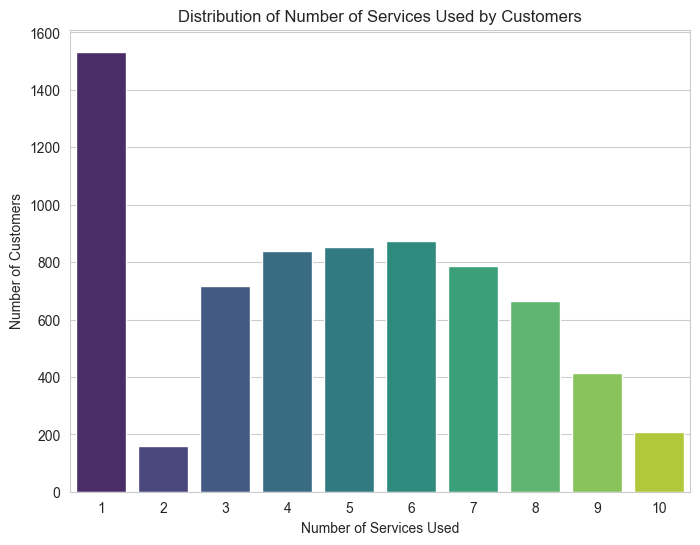

In [177]:
# Create a column for counting the number of services each customer uses
telco_final_df['num_services'] = telco_final_df[services].sum(axis=1)

# Filter out customers who have used more than 1 service
multiple_services = telco_final_df[telco_final_df['num_services'] > 1]

# Count how many people are using more than 1 service
num_multiple_services = len(multiple_services)

# Calculate how many services each of those customers are using
service_counts = multiple_services['num_services'].value_counts()

# Show the results
print(f"Number of customers using more than 1 service: {num_multiple_services}")
print(f"How many services these customers use:")
print(service_counts)

# Plot the distribution of how many services customers use
plt.figure(figsize=(8, 6))
sns.countplot(x='num_services', data=telco_final_df, palette='viridis')
plt.title('Distribution of Number of Services Used by Customers')
plt.xlabel('Number of Services Used')
plt.ylabel('Number of Customers')
plt.show()

In [183]:
#telco_df.T

Most customers use only one service. Therefore, a strategy is to encourage those who use one or two services to use more services. Bundles of three or four services would be ideal.

For creating the bundles, a question that arises is: which services are most commonly acquired when a person has 3 or 4 services?

In [ ]:
customers_with_3or4_services = telco_final_df[(telco_final_df['num_services'] == 3) | (telco_final_df['num_services'] == 4)]


In [185]:
telco_final_df

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV,num_services,conj_3_servicos,conj_3or4_servicos
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,...,0.00,20,0.00,59.65,3,91,5433,3,"[Internet Service, Streaming Movies, Device Pr...","[Internet Service, Streaming Movies, Device Pr..."
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,...,0.00,0,390.80,1024.10,3,69,5302,4,None,"[Phone Service, Internet Service, Online Backu..."
2,1,0,61-71,1,0,1,3,Los Angeles,urban,90065,...,45.61,0,203.94,1910.88,2,81,3179,6,None,None
3,1,1,71-80,1,1,1,1,Inglewood,urban,90303,...,13.43,0,494.00,2995.07,2,88,5337,7,None,None
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,...,0.00,0,234.21,3102.36,2,67,2793,3,"[Phone Service, Internet Service, Unlimited Data]","[Phone Service, Internet Service, Unlimited Data]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,21-31,0,0,0,0,Landers,rural,92285,...,19.31,0,1639.44,3039.53,5,45,5306,1,None,None
7039,0,0,31-41,0,1,1,2,Adelanto,urban,92301,...,48.23,0,865.20,2807.47,3,59,2140,9,None,None
7040,0,1,21-31,0,1,1,2,Amboy,rural,92304,...,45.38,0,2135.52,9453.04,4,71,5560,8,None,None
7041,0,1,31-41,0,1,1,2,Angelus Oaks,rural,92305,...,27.24,0,0.00,319.21,4,59,2793,3,"[Internet Service, Online Security, Unlimited ...","[Internet Service, Online Security, Unlimited ..."


In [189]:
services = [
    'Phone Service',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Music',
    'Streaming Movies',
    'Device Protection Plan',
    'Unlimited Data'
]

# Passo 2: Criar a nova coluna 'customers_with_3or4_services' para os clientes que utilizam exatamente 3 ou 4 serviços
def extract_services(row):
    # Lista vazia para armazenar os nomes dos serviços utilizados
    active_services = []
    for service in services:
        if row[service] == 1:  # Verificar se o cliente usa o serviço
            active_services.append(service)  # Adicionar o nome do serviço na lista
    # Retornar o conjunto dos serviços ativos
    return active_services if len(active_services) == 3 or len(active_services) == 4 else None

# Aplicar a função linha por linha no DataFrame
telco_final_df['conj_3or4_servicos'] = telco_final_df.apply(extract_services, axis=1)

# Filtrar apenas os clientes com 3 serviços para ver a nova coluna
customers_with_3or4_services = telco_final_df[(telco_final_df['num_services'] == 3) | (telco_final_df['num_services'] == 4)]

# Exibir os resultados
customers_with_3or4_services[['conj_3or4_servicos']]


,conj_3or4_servicos
0,"[Internet Service, Streaming Movies, Device Pr..."
1,"[Phone Service, Internet Service, Online Backu..."
4,"[Phone Service, Internet Service, Unlimited Data]"
5,"[Phone Service, Internet Service, Device Prote..."
6,"[Phone Service, Internet Service, Unlimited Data]"
...,...
7019,"[Internet Service, Premium Tech Support, Devic..."
7025,"[Phone Service, Internet Service, Online Backu..."
7035,"[Phone Service, Internet Service, Unlimited Data]"
7036,"[Phone Service, Internet Service, Streaming TV..."


In [191]:
#customers_with_3or4_services[customers_with_3or4_services['num_services']==4]

a seguir, quero entender popularidade dessas combinacoes de 3. vou fazer frequency encoding (freq encod em uma coluna cujos valores sao listas)

In [192]:
customers_with_3or4_services[['conj_3or4_servicos']]


,conj_3or4_servicos
0,"[Internet Service, Streaming Movies, Device Pr..."
1,"[Phone Service, Internet Service, Online Backu..."
4,"[Phone Service, Internet Service, Unlimited Data]"
5,"[Phone Service, Internet Service, Device Prote..."
6,"[Phone Service, Internet Service, Unlimited Data]"
...,...
7019,"[Internet Service, Premium Tech Support, Devic..."
7025,"[Phone Service, Internet Service, Online Backu..."
7035,"[Phone Service, Internet Service, Unlimited Data]"
7036,"[Phone Service, Internet Service, Streaming TV..."


In [193]:
customers_with_3or4_services['conj_3or4_servicos_str'] = customers_with_3or4_services['conj_3or4_servicos'].apply(lambda x: ', '.join(sorted(x)))


C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\1559517529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_with_3or4_services['conj_3or4_servicos_str'] = customers_with_3or4_services['conj_3or4_servicos'].apply(lambda x: ', '.join(sorted(x)))


In [194]:
freq_map = customers_with_3or4_services['conj_3or4_servicos_str'].value_counts().to_dict()

In [195]:
customers_with_3or4_services['conj_3or4_servicos_str_freq_encoded']=customers_with_3or4_services['conj_3or4_servicos_str'].map(freq_map)

C:\Users\EXT2045875\AppData\Local\Temp\ipykernel_10068\3760033828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_with_3or4_services['conj_3or4_servicos_str_freq_encoded']=customers_with_3or4_services['conj_3or4_servicos_str'].map(freq_map)


In [196]:
customers_with_3or4_services

,Churn Label,Gender,AgeGroup,Senior Citizen,Married,Dependents,Nr of Dependents,City,CityArea,Zip Code,...,Total Revenue,Satisfaction Score,Churn Score,CLTV,num_services,conj_3_servicos,conj_3or4_servicos,conjunto_servicos,conj_3or4_servicos_str,conj_3or4_servicos_str_freq_encoded
0,1,0,71-80,1,0,0,0,Los Angeles,urban,90022,...,59.65,3,91,5433,3,"[Internet Service, Streaming Movies, Device Pr...","[Internet Service, Streaming Movies, Device Pr...","[Internet Service, Streaming Movies, Device Pr...","Device Protection Plan, Internet Service, Stre...",1
1,1,1,71-80,1,1,1,1,Los Angeles,urban,90063,...,1024.10,3,69,5302,4,None,"[Phone Service, Internet Service, Online Backu...","[Phone Service, Internet Service, Online Backu...","Internet Service, Online Backup, Phone Service...",146
4,1,1,71-80,1,1,1,1,Whittier,urban,90602,...,3102.36,2,67,2793,3,"[Phone Service, Internet Service, Unlimited Data]","[Phone Service, Internet Service, Unlimited Data]","[Phone Service, Internet Service, Unlimited Data]","Internet Service, Phone Service, Unlimited Data",500
5,1,1,71-80,1,0,1,1,Pico Rivera,urban,90660,...,2235.41,1,95,4638,3,"[Phone Service, Internet Service, Device Prote...","[Phone Service, Internet Service, Device Prote...","[Phone Service, Internet Service, Device Prote...","Device Protection Plan, Internet Service, Phon...",19
6,1,1,71-80,1,1,1,2,Los Alamitos,urban,90720,...,85.73,2,76,3964,3,"[Phone Service, Internet Service, Unlimited Data]","[Phone Service, Internet Service, Unlimited Data]","[Phone Service, Internet Service, Unlimited Data]","Internet Service, Phone Service, Unlimited Data",500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7019,0,0,21-31,0,0,0,0,Coachella,urban,92236,...,1022.50,5,65,2734,4,None,"[Internet Service, Premium Tech Support, Devic...","[Internet Service, Premium Tech Support, Devic...","Device Protection Plan, Internet Service, Prem...",8
7025,0,1,31-41,0,0,0,0,Niland,rural,92257,...,94.93,3,32,5230,4,None,"[Phone Service, Internet Service, Online Backu...","[Phone Service, Internet Service, Online Backu...","Internet Service, Online Backup, Phone Service...",146
7035,0,0,61-71,0,0,0,0,Westmorland,rural,92281,...,3936.58,3,35,4591,3,"[Phone Service, Internet Service, Unlimited Data]","[Phone Service, Internet Service, Unlimited Data]","[Phone Service, Internet Service, Unlimited Data]","Internet Service, Phone Service, Unlimited Data",500
7036,0,0,51-61,0,0,0,0,Winterhaven,rural,92283,...,2029.71,3,20,2464,4,None,"[Phone Service, Internet Service, Streaming TV...","[Phone Service, Internet Service, Streaming TV...","Internet Service, Phone Service, Streaming TV,...",119


In [197]:
#customers_with_3or4_services['conj_3or4_servicos_str_freq_encoded']
telecom_func(customers_with_3or4_services,'conj_3or4_servicos_str_freq_encoded')



Qty of unique values: 27

Which are the unique values: [  1 146 500  19  23   5   7  28 124 119  24  25  90   6  29   4   2  16
  10   8   3  72  11  17  18  36   9]
\Qty of null values: 0
\Qty per option (sorted):
conj_3or4_servicos_str_freq_encoded
1       17
2       14
3       21
4       16
5       20
6       24
7       28
8       16
9        9
10      30
11      33
16      16
17      34
18      18
19      19
23      23
24      48
25      25
28      28
29      29
36      36
72      72
90      90
119    119
124    124
146    146
500    500
Name: count, dtype: int64
Number of categories in "conj_3or4_servicos_str_freq_encoded" is greater than 20, countplot graphic wont be displayed.


In [203]:
print(customers_with_3or4_services[['conj_3or4_servicos_str', 'conj_3or4_servicos_str_freq_encoded']].to_string())

                                                               conj_3or4_servicos_str  conj_3or4_servicos_str_freq_encoded
0                          Device Protection Plan, Internet Service, Streaming Movies                                    1
1                      Internet Service, Online Backup, Phone Service, Unlimited Data                                  146
4                                     Internet Service, Phone Service, Unlimited Data                                  500
5                             Device Protection Plan, Internet Service, Phone Service                                   19
6                                     Internet Service, Phone Service, Unlimited Data                                  500
8                                     Internet Service, Phone Service, Unlimited Data                                  500
9                                    Internet Service, Online Security, Phone Service                                   23
11              

In [ ]:
#confirmar que frequencias estao certas
print(customers_with_3or4_services[customers_with_3or4_services['conj_3or4_servicos_str'] == 'Device Protection Plan, Internet Service, Streaming TV'].to_string())


      Churn Label  Gender AgeGroup  Senior Citizen  Married  Dependents  Nr of Dependents     City CityArea  Zip Code  Latitude   Longitude  Population  Referred a Friend  Number of Referrals  Tenure in Months  Phone Service  Avg Monthly Long Distance Charges  Multiple Lines  Internet Service Internet Type  Avg Monthly GB Download  Online Security  Online Backup  Device Protection Plan  Premium Tech Support  Streaming TV  Streaming Movies  Streaming Music  Unlimited Data        Contract  Paperless Billing   Payment Method  Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  Satisfaction Score  Churn Score  CLTV  num_services                                           conj_3_servicos                                        conj_3or4_servicos                                         conjunto_servicos                                  conj_3or4_servicos_str  conj_3or4_servicos_str_freq_encoded
266             1       1    71-80  

To reduce churn, we could focus in offering bundle discounts that include multiple services, such as Phone Service, Internet Service, and others
By providing value through these bundles, customers are more likely to stay with the company, as they get more services at a better price

3. Strategies suggested to reduce churn in the future

For the customers that use more than one service, how many services are they using?

visualize the services that are used together by customers who use multiple services

## Codificacao

In [ ]:
#display(telco_df.head(1).T)    

In [ ]:
display(telco_final_df.head(1).T)

#### 1. Ordinal Encoding

Atributos: Agegroup, Contract, Nr of dependents

In [ ]:
#Age group

encoder = OrdinalEncoder(categories=[['19-21','21-31','31-41','41-51','51-61','61-71','71-80']])
telco_final_df['AgeGroup'] = encoder.fit_transform(telco_final_df[['AgeGroup']]) 

In [ ]:
#Contract

encoder = OrdinalEncoder(categories=[['Month-to-Month', 'One Year', 'Two Year']])
telco_final_df['Contract'] = encoder.fit_transform(telco_final_df[['Contract']]) 

In [ ]:
#Nr of Dependents

#encoder = OrdinalEncoder(categories=[[0, 1, 2, 3, 4]])
encoder = OrdinalEncoder(categories=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

telco_final_df['Nr of Dependents'] = encoder.fit_transform(telco_final_df[['Nr of Dependents']]) 

#### 2. One Hot Encoding

Atributos: internet type, payment method, CityArea 


In [ ]:
# contingency_table = pd.crosstab(telco_df['City'], telco_df['Zip Code'])

#print(contingency_table.head(50))     

#usar tabela de contingencia nao foi muito util, nao esta facil de ver porque ha muitas categorias

In [ ]:
# Internet type 

# ['DSL' 'Fiber Optic' 'Cable' 'Desconhecido']   
internet_type=pd.get_dummies(telco_final_df['Internet Type'], prefix='internet').astype(int)
internet_type

In [ ]:
telco_final_df.drop(['Internet Type'], axis=1, inplace=True)      

In [ ]:
telco_final_df=pd.concat([telco_final_df, internet_type], axis=1) 

In [ ]:
telco_final_df

In [ ]:
#payment method

payment_method=pd.get_dummies(telco_final_df['Payment Method'], prefix='payment_method').astype(int)
payment_method

In [ ]:
telco_final_df=pd.concat([telco_final_df, payment_method], axis=1) 

In [ ]:
telco_final_df.drop(['Payment Method'], axis=1, inplace=True)  

In [ ]:
telco_final_df

In [ ]:
#CityArea

CityArea=pd.get_dummies(telco_final_df['CityArea'], prefix='area').astype(int)
CityArea

In [ ]:
telco_final_df=pd.concat([telco_final_df, CityArea], axis=1) 

In [ ]:
telco_final_df.drop(['CityArea'], axis=1, inplace=True)  

In [ ]:

with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(telco_final_df)

#### 3. Frequency Encoding

Atributos: City, Zip Code, CLTV

In [ ]:
#City

city_freq=telco_final_df['City'].value_counts()
telco_final_df['City_FreqEnc']=telco_final_df['City'].map(city_freq) #Agora tem 35 valores unicos, reduziu cardinalidade

In [ ]:
telco_final_df=telco_final_df.drop('City', axis=1)

In [ ]:
#Zip Code

zipcode_freq=telco_final_df['Zip Code'].value_counts()
telco_final_df['ZipCode_FreqEnc']=telco_final_df['Zip Code'].map(zipcode_freq) #fiquei com 18 valores unicos, antes tinha 1626
#telecom_func(telco_final_df, 'Zip Code')

In [ ]:
telco_final_df=telco_final_df.drop('Zip Code', axis=1)

In [ ]:
#CLTV

cltv_freq=telco_final_df['CLTV'].value_counts()
telco_final_df['cltv_FreqEnc']=telco_final_df['CLTV'].map(cltv_freq) #fiquei com 8, antes tinha 3438
#telco_final_df
#telecom_func(telco_final_df, 'CLTV')

In [ ]:
telco_final_df=telco_final_df.drop('CLTV', axis=1)

In [ ]:
#telco_final_df['CLTV'] Confirmei que ja nao existe

In [ ]:

with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(telco_final_df.head(10))

In [ ]:
#f, ax1 = plt.subplots(1, 1, figsize=(14,10))                                      

corr = telco_final_df.select_dtypes(include=[float, int]).corr()
corr
#sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
#ax1.set_title("correlation matrix ", fontsize=14)

#plt.show() 

__________________

### Data Split

In [ ]:
X = telco_final_df.drop('Churn Label', axis=1)
y = telco_final_df['Churn Label']

In [ ]:
X

In [ ]:
import plotly.express as px

In [ ]:
labels=["no","yes"]

churn_or_not = telco_final_df["Churn Label"].value_counts().tolist()
values = [churn_or_not[0], churn_or_not[1]]
values 

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Churn Label',data=telco_final_df, hue='Churn Label', dodge=False)
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
print('churn yes:', round(telco_final_df['Churn Label'].value_counts().iloc[0]/len(telco_final_df) * 100,2), '% do dataset')
print('churn no:', round(telco_final_df['Churn Label'].value_counts().iloc[1]/len(telco_final_df) * 100,2), '% do dataset')

esse dataset e desbalanceado, linhas com churn=no sao 73.4% do dataset e churn yes sao 26.6%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) quando tiro stratify, recall e f1 score diminuem nas avaliacoes dos 3 modelos..o precision mantem..

In [ ]:
print("\nDistribuição das classes no conjunto de treino:")
print(y_train.value_counts(normalize=True))

In [ ]:
print("\nDistribuição das classes no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Pra lidar com desbalanceamento aqui, vou somente fazer esse stratified datasplit pra garantir que haja boa representacao dos dados no treino e teste. Nao vou usar metodos de geracao de dados sinteticos, nao vejo necessidade..desbalanceamento nao e extremo.

### Feature scaling

dados a normalizar: AgeGroup,Latitude,Longitude,Population,Tenure in Months,Avg Monthly Long Distance Charge,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Long Distance Charges,  Total Revenue,Churn Score, City_FreqEnc,  ZipCode_FreqEnc,  cltv_FreqEnc

In [ ]:
#Vou usar standard scaler
def Standard_Scaler (df, col_names):
    scaler = StandardScaler()
    df[col_names] = scaler.fit_transform(df[col_names])
    
    return df

In [ ]:
telco_final_df.columns #Avg Monthly Long Distance Charge

In [ ]:
'''col_names = ['AgeGroup','Latitude','Longitude','Population','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge',
             'Total Charges','Total Refunds','Total Long Distance Charges', 'Total Revenue', 'Churn Score', 'City_FreqEnc',  'ZipCode_FreqEnc',  
             'cltv_FreqEnc','Number of Referrals','Nr of Dependents']'''
#Nao escale valores categoricos - quando ha ordem . tira AgeGroup, Tenure in Months
#RF e XGBoost nao exigem scaler

'''col_names = ['Latitude','Longitude','Population','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge',
             'Total Charges','Total Refunds','Total Long Distance Charges', 'Total Revenue', 'Churn Score','Number of Referrals','Nr of Dependents']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)'''

In [ ]:
with pd.option_context('display.max_columns', None, 'display.width', 1000):
    print(X_train)

In [ ]:
X_train.describe()

### Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV

Opcoes de escolha: Random forest, xgboost

### 1. Random Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 300, 400, 500],        # Número de árvores
    'max_depth': [10, 20, None],            # Profundidade máxima
    'min_samples_split': [2, 5],            # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],              # Mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2'],           # Máximo de recursos considerados
    'bootstrap': [True, False],                 # Bootstrap habilitado/desabilitado
    'class_weight': ['balanced', None],         # Peso para lidar com desbalanceamento
}

In [ ]:
#RandomForest
rf_classifier = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=0) # n estimator 100 pra 1000 so mudou no recall, mudou 1%. Invetiga custo computacional de ter alto n estimator pra ver se diexo 100 ou 1000 ja que nao tem muita diferenca
rf_classifier.fit(X_train, y_train) 

In [ ]:
# GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring='f1',  # Escolha a métrica mais relevante para o problema
    cv=4,          # Validação cruzada
    verbose=2,     
    n_jobs=-1       # Usa todos os núcleos disponíveis
)

In [ ]:
#grid_search_rf.fit(X_train, y_train)      #21:54

In [ ]:
# Resultados
#print(f"Melhores parâmetros: {grid_search_rf.best_params_}")
#print(f"Melhor score: {grid_search_rf.best_score_}")

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

senior citizen tem mais importancia que under 30.

In [ ]:
'''corr = telco_final_df[['Under 30', 'Senior Citizen', 'Churn Label']].corr()
corr'''

senior citizen tem mais importancia que under 30. E tambem olhando pra correlacao destes 2 atributos com o alvo, notamos que senior citizen tem maior correlacao com o alvo do que under 30. Vou eliminar under 30.

In [ ]:
y_pred = rf_classifier.predict(X_test)

y_pred_proba = rf_classifier.predict_proba(X_test)

In [ ]:
rf_score_precision = precision_score(y_true=y_test,y_pred=y_pred)
rf_score_recall = recall_score(y_true=y_test, y_pred=y_pred)
rf_score_f1 = f1_score(y_true=y_test, y_pred=y_pred)
                                                                                                                                                          
print(f" RF Precision: {rf_score_precision}")
print(f" RF Recall: {rf_score_recall}")
print(f" RF F1-score: {rf_score_f1}")

### 2. XGBoost

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500, 600],  # Nr de árvores
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],          # Profundidade max da árvore
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Taxa de aprendizado
    'subsample': [0.8, 0.9, 1.0],    # Fracionamento da amostra
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fracao de colunas
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],           # Penalidade de regularizacao
    'scale_pos_weight': [1, 10, 20]
}

In [ ]:
xgb_classifier = XGBClassifier(scale_pos_weight=0.1) 
xgb_classifier.fit(X_train, y_train) 

In [ ]:
# GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring='f1',  # Escolha a métrica mais relevante para o problema
    cv=2,          # Validação cruzada
    verbose=2,
    n_jobs=-1       # Usa todos os núcleos disponíveis
)

In [ ]:
#grid_search_xgb.fit(X_train, y_train) 

In [ ]:
# Resultados
#print(f"Melhores parâmetros: {grid_search_xgb.best_params_}")
#print(f"Melhor score: {grid_search_xgb.best_score_}")

In [ ]:
y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)

In [ ]:
#Precision - se todos clientes classificados como churned, eram realmente churned
xgb_score_precision = precision_score(y_true=y_test,y_pred=y_pred)

#Recall- se consegue classificar todos que sao churned como churned
xgb_score_recall = recall_score(y_true=y_test, y_pred=y_pred)

#F1-Score
xgb_score_f1 = f1_score(y_true=y_test, y_pred=y_pred)

print(f" XGB Precision: {xgb_score_precision}")
print(f" XGB Recall: {xgb_score_recall}")
print(f" XGB F1-score: {xgb_score_f1}")